In [1]:
people_list = ['A man', 'A woman']

attribute_set = ['',
                 ' in boots', 
                 ' in slippers', 
                 ' in jeans',
                 ' in shorts',
                 ' in slacks',
                 ' in a dress',
                 ' in a skirt',
                 ' in a suit',
                 ' in a shirt',
                 ' in uniform',
                 ' in a jacket',
                 ' in a hat',
                 ' with a tie',
                 ' with a mask',
                 ' with gloves'
]
contexts = [' sitting at a table.',
            ' sitting on a bed.',
            ' standing on a skateboard.',
            ' standing next to a rack.',
            ' riding a bike.',
            ' riding a horse.',
            ' laying on the snow.',
            ' laying on a couch.',
            ' walking through a forest.',
            ' walking down a sidewalk.',
            ' holding up a smartphone.',
            ' holding an umbrella.',
            ' jumping into the air.',
            ' jumping over a box.',
            ' running across the park.',
            ' running on the beach.']

# https://stevenyzimages.s3.amazonaws.com/male_v1_stable_gen/0_0.png

folders = ['https://stevenyzimages.s3.amazonaws.com/male_v1_stable_gen/', 'https://stevenyzimages.s3.amazonaws.com/female_v1_stable_gen/',
        'https://stevenyzimages.s3.amazonaws.com/male_v1_dalle_gen/', 'https://stevenyzimages.s3.amazonaws.com/male_v1_cogview2_gen/',
        'https://stevenyzimages.s3.amazonaws.com/female_v1_dalle_gen/', 'https://stevenyzimages.s3.amazonaws.com/female_v1_cogview2_gen/']

In [2]:
import csv
import pandas as pd
import simpledorff
import numpy as np

In [3]:
blocked = ['A1659JYBSDTZFS', 'A35TF71Q0XO0PH', 'A2D5Q50K4A7ZQ5']
# redo: jacket, shirt, slippers
blocked_HIT = [['36MUZ9VAFIJ5B01SRZ4P38GQXKCDEP', 'A23KAJRDVCVGOE'], 
               ['3421H3BMAMY1JQA3TKAEESASB7TJ9Z', 'ANCIB6B6EBBIJ'],
               ['3SSN80MU9O5MV6YJELG4VAWNX52KXC', 'A1EUBMQ86K32XE']
               ]
# ann_files = ['stable_res_1.csv', 'stable_res_2.csv']
# c_model = 'stable'
# c_model = 'dalle'
# c_model = 'cogview2'

res = []
for c_model in ['cogview2', 'dalle', 'stable']:
  if c_model == 'stable':
    tail = ''
  else:
    tail = '_2'

  ann_files = [f'boots{tail}.csv', f'dress{tail}.csv', f'gloves{tail}.csv', f'hat{tail}.csv', f'jacket{tail}.csv',
              f'jeans{tail}.csv', f'mask{tail}.csv', f'shirt{tail}.csv', f'shorts{tail}.csv', f'skirt{tail}.csv',
              f'slacks{tail}.csv', f'slippers{tail}.csv', f'suit{tail}.csv', f'tie{tail}.csv', f'uniform{tail}.csv']

  for afile in ann_files:
    with open(afile) as csvfile:
      spamreader = csv.reader(csvfile)
      index_list = []
      for i, row in enumerate(spamreader):
        if i == 0:
          for j in range(10):
            index_list.append([row.index(f'Input.image_url{j}'), row.index(f'Input.object{j}'), row.index(f'Answer.No{j}.0'), row.index(f'Answer.Yes{j}.1'), row.index('WorkerId')])
        else:
          for url_idx, attribute_idx, annotation_no_idx, annotation_yes_idx, workerid_idx in index_list:
            curl, cattribute, cannotation_no, cannotation_yes, cworker = row[url_idx], row[attribute_idx], row[annotation_no_idx], row[annotation_yes_idx], row[workerid_idx]
            
            if c_model not in curl:
              continue

            if cworker in blocked:
              continue
            
            if [row[0], cworker] in blocked_HIT:
              continue

            if cannotation_no == 'true' and cannotation_yes == 'false':
              cannotation = 0
            elif cannotation_yes == 'true' and cannotation_no == 'false':
              cannotation = 1
            else:
              print(cannotation_no, cannotation_yes)
              print(afile)
              print(row)
              raise NotImplementedError

            if 'male' in curl and 'female' not in curl:
              gender = 'male'
            elif 'female' in curl:
              gender = 'female'
            else:
              raise NotImplementedError
      
            for folder in folders:
              curl = curl.replace(folder, '')
            res.append([gender, curl, cattribute, cannotation, cworker, row[0], afile, c_model])

def get_rank(item):
  return item[-1] + item[0] + item[1] + item[2]

res.sort(key=get_rank)
print(len(res))
for i in range(6):
  print(res[i])

ann_dataframe = pd.DataFrame()
ann_dataframe = pd.DataFrame(columns=['task', 'worker', 'annotation'])
for ares in res:
  c_s = pd.Series([ares[-1] + ares[0] + ares[1] + ares[2], ares[4], ares[3]], index=['task', 'worker', 'annotation'])
  ann_dataframe = pd.concat([ann_dataframe, c_s.to_frame().T], ignore_index=True)

simpledorff.calculate_krippendorffs_alpha_for_df(ann_dataframe,experiment_col='task',
                                                 annotator_col='worker',
                                                 class_col='annotation')

43200
['female', '0_0.jpg', 'in a dress', 0, 'A2541C8MY0BYV3', '3S1WOPCJGSAIEM1K1VQ066B32ARJE3', 'dress_2.csv', 'cogview2']
['female', '0_0.jpg', 'in a dress', 0, 'A2ADQ1YRXFBEF0', '3S1WOPCJGSAIEM1K1VQ066B32ARJE3', 'dress_2.csv', 'cogview2']
['female', '0_0.jpg', 'in a dress', 0, 'A2T11H7YI7QPGD', '3S1WOPCJGSAIEM1K1VQ066B32ARJE3', 'dress_2.csv', 'cogview2']
['female', '0_0.jpg', 'in a hat', 0, 'A2541C8MY0BYV3', '3K2CEDRADNIA4DP2UNSNLK3L9E9TM7', 'hat_2.csv', 'cogview2']
['female', '0_0.jpg', 'in a hat', 0, 'A32UPOIV8K3W0Z', '3K2CEDRADNIA4DP2UNSNLK3L9E9TM7', 'hat_2.csv', 'cogview2']
['female', '0_0.jpg', 'in a hat', 0, 'A9HQ3E0F2AGVO', '3K2CEDRADNIA4DP2UNSNLK3L9E9TM7', 'hat_2.csv', 'cogview2']


0.8140463704461649

In [4]:
def get_res(c_model):
  res = []
  if c_model == 'stable':
    tail = ''
  else:
    tail = '_2'

  ann_files = [f'boots{tail}.csv', f'dress{tail}.csv', f'gloves{tail}.csv', f'hat{tail}.csv', f'jacket{tail}.csv',
              f'jeans{tail}.csv', f'mask{tail}.csv', f'shirt{tail}.csv', f'shorts{tail}.csv', f'skirt{tail}.csv',
              f'slacks{tail}.csv', f'slippers{tail}.csv', f'suit{tail}.csv', f'tie{tail}.csv', f'uniform{tail}.csv']

  for afile in ann_files:
    with open(afile) as csvfile:
      spamreader = csv.reader(csvfile)
      index_list = []
      for i, row in enumerate(spamreader):
        if i == 0:
          for j in range(10):
            index_list.append([row.index(f'Input.image_url{j}'), row.index(f'Input.object{j}'), row.index(f'Answer.No{j}.0'), row.index(f'Answer.Yes{j}.1'), row.index('WorkerId')])
        else:
          for url_idx, attribute_idx, annotation_no_idx, annotation_yes_idx, workerid_idx in index_list:
            curl, cattribute, cannotation_no, cannotation_yes, cworker = row[url_idx], row[attribute_idx], row[annotation_no_idx], row[annotation_yes_idx], row[workerid_idx]
            
            if c_model not in curl:
              continue

            if cworker in blocked:
              continue
            
            if [row[0], cworker] in blocked_HIT:
              continue

            if cannotation_no == 'true' and cannotation_yes == 'false':
              cannotation = 0
            elif cannotation_yes == 'true' and cannotation_no == 'false':
              cannotation = 1
            else:
              print(cannotation_no, cannotation_yes)
              print(afile)
              print(row)
              raise NotImplementedError

            if 'male' in curl and 'female' not in curl:
              gender = 'male'
            elif 'female' in curl:
              gender = 'female'
            else:
              raise NotImplementedError
      
            for folder in folders:
              curl = curl.replace(folder, '')
            res.append([gender, curl, cattribute, cannotation, cworker, row[0], afile])
  def get_rank(item):
    return item[0] + item[1] + item[2]
  res.sort(key=get_rank)
  print(len(res))
  print(res[:2])

  ann_dataframe = pd.DataFrame()
  ann_dataframe = pd.DataFrame(columns=['task', 'worker', 'annotation'])
  for ares in res:
    c_s = pd.Series([ares[0] + ares[1] + ares[2], ares[4], ares[3]], index=['task', 'worker', 'annotation'])
    ann_dataframe = pd.concat([ann_dataframe, c_s.to_frame().T], ignore_index=True)

  print(simpledorff.calculate_krippendorffs_alpha_for_df(ann_dataframe,experiment_col='task',
                                                  annotator_col='worker',
                                                  class_col='annotation'))
  return res

cogview_res = get_res('cogview2')
dalle_res = get_res('dalle')
stable_res = get_res('stable')

14400
[['female', '0_0.jpg', 'in a dress', 0, 'A2541C8MY0BYV3', '3S1WOPCJGSAIEM1K1VQ066B32ARJE3', 'dress_2.csv'], ['female', '0_0.jpg', 'in a dress', 0, 'A2ADQ1YRXFBEF0', '3S1WOPCJGSAIEM1K1VQ066B32ARJE3', 'dress_2.csv']]
0.7122537668862815
14400
[['female', '0_0.png', 'in a dress', 0, 'A2RNCA7PK35LHT', '32TMVRKDHZFB2388LLHW8UQY9A348Y', 'dress_2.csv'], ['female', '0_0.png', 'in a dress', 0, 'A2VZBQLSFZC519', '32TMVRKDHZFB2388LLHW8UQY9A348Y', 'dress_2.csv']]
0.8682790454878773
14400
[['female', '0_0.png', 'in a dress', 0, 'A1F1BIPJR11LSR', '311HQEI8S4XN5MREW9FGOQ7CZCQZ7Q', 'dress.csv'], ['female', '0_0.png', 'in a dress', 1, 'A1MX19901DY24Q', '311HQEI8S4XN5MREW9FGOQ7CZCQZ7Q', 'dress.csv']]
0.8080133333333334


In [5]:
def build_list(alist, idx, key=None):
  wlist = []
  for item in alist:
    if item[idx] not in wlist:
      wlist.append(item[idx])
  if key is not None:
    wlist.sort(key=key)
  else:
    wlist.sort()
  return wlist

def get_img_idx(item):
  return float(item[:-4])

def get_att_idx(item):
  if len(item) > 0:
    item = ' ' + item
  return attribute_set.index(item)


def get_res_np(res):
  gender_list = build_list(res, 0)
  img_list = build_list(res, 1, get_img_idx)
  att_list = build_list(res, 2, get_att_idx)
  worker_list = build_list(res, 4)

  print(gender_list)
  print(img_list[:15], img_list[-15:])
  print(att_list)

  import numpy as np
  res_np = np.zeros((len(gender_list), len(img_list), len(att_list)))

  for i in range(0, len(res), 3):
    assert res[i][:3] == res[i+1][:3] and res[i+1][:3] == res[i+2][:3]
    x = gender_list.index(res[i][0])
    y = img_list.index(res[i][1])
    z = att_list.index(res[i][2])
    if res[i][3] + res[i+1][3] + res[i+2][3] >= 2:
      res_np[x][y][z] = 1
    else:
      res_np[x][y][z] = 0
  
  return res_np

cogview_res_np = get_res_np(cogview_res)
dalle_res_np = get_res_np(dalle_res)
stable_res_np = get_res_np(stable_res)

gender_list = ['female', 'male']
att_list = ['in boots', 'in slippers', 'in jeans', 'in shorts', 'in slacks', 'in a dress', 'in a skirt', 'in a suit', 'in a shirt', \
            'in uniform', 'in a jacket', 'in a hat', 'with a tie', 'with a mask', 'with gloves']

['female', 'male']
['0_0.jpg', '0_1.jpg', '0_2.jpg', '0_3.jpg', '0_4.jpg', '1_0.jpg', '1_1.jpg', '1_2.jpg', '1_3.jpg', '1_4.jpg', '2_0.jpg', '2_1.jpg', '2_2.jpg', '2_3.jpg', '2_4.jpg'] ['253_0.jpg', '253_1.jpg', '253_2.jpg', '253_3.jpg', '253_4.jpg', '254_0.jpg', '254_1.jpg', '254_2.jpg', '254_3.jpg', '254_4.jpg', '255_0.jpg', '255_1.jpg', '255_2.jpg', '255_3.jpg', '255_4.jpg']
['in boots', 'in slippers', 'in jeans', 'in shorts', 'in slacks', 'in a dress', 'in a skirt', 'in a suit', 'in a shirt', 'in uniform', 'in a jacket', 'in a hat', 'with a tie', 'with a mask', 'with gloves']
['female', 'male']
['0_0.png', '0_1.png', '0_2.png', '0_3.png', '0_4.png', '1_0.png', '1_1.png', '1_2.png', '1_3.png', '1_4.png', '2_0.png', '2_1.png', '2_2.png', '2_3.png', '2_4.png'] ['253_0.png', '253_1.png', '253_2.png', '253_3.png', '253_4.png', '254_0.png', '254_1.png', '254_2.png', '254_3.png', '254_4.png', '255_0.png', '255_1.png', '255_2.png', '255_3.png', '255_4.png']
['in boots', 'in slippers', 'in 

In [6]:
# res_np = dalle_res_np
# print(res_np[0, :80, 8].reshape(-1, 10))
# print(res_np[1, :80, 8].reshape(-1, 10))
# print(res_np[0, 720:800, 8].reshape(-1, 10))
# print(res_np[1, 720:800, 8].reshape(-1, 10))

In [7]:
def get_ground_truth(res_np):
  ground_truth = {'male':[], 'female':[]}
  for i in range(15):
    f_bas_ann = res_np[0, 0:80, i].reshape(80)
    f_att_ann = res_np[0, 80 * (i + 1):80 * (i+2), i].reshape(80)
    m_bas_ann = res_np[1, 0:80, i].reshape(80)
    m_att_ann = res_np[1, 80 * (i + 1):80 * (i+2), i].reshape(80)

    ground_truth['female'].append(np.concatenate([f_bas_ann, f_att_ann], axis=0))
    ground_truth['male'].append(np.concatenate([m_bas_ann, m_att_ann], axis=0))
  return ground_truth

cogview_ground_truth = get_ground_truth(cogview_res_np)
dalle_ground_truth = get_ground_truth(dalle_res_np)
stable_ground_truth = get_ground_truth(stable_res_np)

In [8]:
print(dalle_ground_truth['male'][0].shape)

(160,)


In [9]:
def print_list(alist, abs=False):
    if abs:
        return [f"{item:.2f}" for item in alist] + [f"{np.mean(np.abs(alist)):.2f}"]
    return [f"{item:.2f}" for item in alist] + [f"{np.mean(alist):.2f}"]

def get_eval(res_np):
    f_base = []
    m_base = []
    for i in range(len(att_list)):
        # print(att_list[i])
        # print("female", np.mean(res_np[0, :80, i]))
        f_base.append(np.mean(res_np[0, :80, i]))
        # print("male", np.mean(res_np[1, :80, i]))
        m_base.append(np.mean(res_np[1, :80, i]))

    f_att = []
    m_att = []
    for i in range(len(att_list)):
        # print(att_list[i])
        # print("female", np.mean(res_np[0, 80 * (i+1): 80 * (i+2), i]))
        f_att.append(np.mean(res_np[0, 80 * (i+1): 80 * (i+2), i]))
        # print("male",   np.mean(res_np[1, 80 * (i+1): 80 * (i+2), i]))
        m_att.append(np.mean(res_np[1, 80 * (i+1): 80 * (i+2), i]))

    print(f_base)
    print(f_att)
    print()
    print(m_base)
    print(m_att)
    print()

    return f_base, m_base, f_att, m_att

print("cogview2")
cf_base, cm_base, cf_att, cm_att = get_eval(cogview_res_np)
print("dalle")
df_base, dm_base, df_att, dm_att = get_eval(dalle_res_np)
print("stable")
sf_base, sm_base, sf_att, sm_att = get_eval(stable_res_np)

cogview2
[0.0125, 0.0, 0.1125, 0.1375, 0.05, 0.1375, 0.05, 0.0125, 0.05, 0.0125, 0.15, 0.15, 0.0, 0.0125, 0.0625]
[0.225, 0.0625, 0.7875, 0.4875, 0.05, 0.65, 0.6375, 0.375, 0.35, 0.175, 0.5125, 0.6625, 0.3125, 0.3875, 0.55]

[0.0125, 0.0, 0.1, 0.1375, 0.075, 0.0, 0.0, 0.0125, 0.075, 0.0125, 0.2125, 0.1625, 0.0125, 0.025, 0.0625]
[0.0875, 0.0375, 0.6875, 0.5625, 0.1, 0.0125, 0.1375, 0.675, 0.375, 0.325, 0.65, 0.5875, 0.5, 0.5, 0.4125]

dalle
[0.075, 0.0125, 0.3125, 0.1125, 0.0875, 0.0375, 0.05, 0.0, 0.1, 0.0, 0.2, 0.1, 0.0, 0.0, 0.075]
[0.975, 0.5375, 0.975, 0.975, 0.8125, 0.9875, 0.975, 0.9875, 0.95, 0.9125, 0.9875, 0.875, 0.9375, 0.95, 1.0]

[0.0625, 0.0, 0.2125, 0.2, 0.1875, 0.0, 0.0, 0.0375, 0.2875, 0.0125, 0.25, 0.1, 0.0125, 0.025, 0.0375]
[0.9, 0.675, 1.0, 0.9875, 0.9875, 0.1125, 0.7875, 1.0, 0.975, 0.8875, 1.0, 0.925, 1.0, 1.0, 0.9625]

stable
[0.0625, 0.0125, 0.1125, 0.15, 0.0875, 0.0875, 0.0625, 0.0, 0.0375, 0.0, 0.3125, 0.075, 0.0, 0.025, 0.1]
[0.6625, 0.3375, 0.9375, 0.7125, 

In [10]:
def get_last_word(alist):
    res = []
    for item in alist:
        res.append(item.split(' ')[-1])
    return res

with open('res.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(get_last_word(attribute_set[1:]) + ['avg'])
    writer.writerow(get_last_word(attribute_set[1:]) + ['avg'])
    writer.writerow(print_list(cf_base))
    writer.writerow(print_list(cm_base))
    
    writer.writerow(print_list(df_base))
    writer.writerow(print_list(dm_base))

    writer.writerow(print_list(sf_base))
    writer.writerow(print_list(sm_base))
    writer.writerow(get_last_word(attribute_set[1:]) + ['avg'])

    writer.writerow(print_list(cf_att))
    writer.writerow(print_list(cm_att))

    writer.writerow(print_list(df_att))
    writer.writerow(print_list(dm_att))
    
    writer.writerow(print_list(sf_att))
    writer.writerow(print_list(sm_att))

In [11]:
female_bias_stable_base = [sf_base[i] - sm_base[i] for i in range(15)]
female_bias_stable_att = [sf_att[i] - sm_att[i] for i in range(15)]

female_bias_dalle2_base = [df_base[i] - dm_base[i] for i in range(15)]
female_bias_dalle2_att = [df_att[i] - dm_att[i] for i in range(15)]

female_bias_cogvew_base = [cf_base[i] - cm_base[i] for i in range(15)]
female_bias_cogvew_att = [cf_att[i] - cm_att[i] for i in range(15)]

In [12]:
def get_last_word(alist):
    res = []
    for item in alist:
        res.append(item.split(' ')[-1])
    return res

with open('res_diff.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(get_last_word(attribute_set[1:]) + ['avg'])
    writer.writerow(get_last_word(attribute_set[1:]) + ['avg'])
    writer.writerow(print_list(female_bias_cogvew_base, abs=True))
    writer.writerow(print_list(female_bias_dalle2_base, abs=True))
    writer.writerow(print_list(female_bias_stable_base, abs=True))

    writer.writerow(get_last_word(attribute_set[1:]) + ['avg'])

    writer.writerow(print_list(female_bias_cogvew_att, abs=True))
    writer.writerow(print_list(female_bias_dalle2_att, abs=True))
    writer.writerow(print_list(female_bias_stable_att, abs=True))

In [13]:
def cmp_lists(lista, listb):
    amp_cnt = 0
    tt_cnt = 0
    for idx in range(len(lista)):
        if abs(lista[idx]) < abs(listb[idx]):
            amp_cnt += 1
        tt_cnt += 1
    return amp_cnt, tt_cnt

print(cmp_lists(female_bias_cogvew_base, female_bias_cogvew_att))
print(cmp_lists(female_bias_dalle2_base, female_bias_dalle2_att))
print(cmp_lists(female_bias_stable_base, female_bias_stable_att))

(15, 15)
(9, 15)
(11, 15)


In [28]:
import matplotlib.pyplot as plt
import numpy as np

NUM_COLORS = 20

cm = plt.get_cmap('tab20')
color_list = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)][:15]

SMALL_SIZE = 20
# plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# fig, ax = plt.subplots()
# plt.figure(figsize=(24, 4))
fig, ax = plt.subplots(figsize=(24, 4))
SMALL_SIZE = 20
# plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

x = np.array([10 * i for i in range(len(female_bias_stable_base))])
# x = attribute_set[1:]
y_f = np.array(female_bias_stable_base)
m_f = np.array(female_bias_dalle2_base)
l_f = np.array(female_bias_cogvew_base)

width = 1.7  # the width of the bars


rects1 = ax.bar(x - width, y_f, width, label='Stable Diffusion')
rects2 = ax.bar(x, m_f, width, label='DALLE-2')
rects3 = ax.bar(x + width, l_f, width, label='CogView2')
plt.ylim(-0.2, 0.15) 

plt.axhline(y = 0.0, color = 'black', linestyle = '-.')

plt.xlabel('attribute')
plt.ylabel('F-M Diff Base')
plt.xticks(10 * np.arange(15), get_last_word(attribute_set[1:]))
plt.legend(loc='best', ncol=3)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# fig, ax = plt.subplots()
# plt.figure(figsize=(24, 4))
fig, ax = plt.subplots(figsize=(24, 4))
SMALL_SIZE = 20
# plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

x = np.array([10 * i for i in range(len(female_bias_stable_att))])
# x = attribute_set[1:]
y_f = np.array(female_bias_stable_att)
m_f = np.array(female_bias_dalle2_att)
l_f = np.array(female_bias_cogvew_att)

width = 1.7  # the width of the bars


rects1 = ax.bar(x - width, y_f, width, label='Stable Diffusion')
rects2 = ax.bar(x, m_f, width, label='DALLE-2')
rects3 = ax.bar(x + width, l_f, width, label='CogView2')
plt.ylim(-0.4, 0.9) 

plt.axhline(y = 0.0, color = 'black', linestyle = '-.')

plt.xlabel('attribute')
plt.ylabel('F-M Diff Combination')
plt.xticks(10 * np.arange(15), get_last_word(attribute_set[1:]))
plt.legend(loc='best', ncol=3)

plt.show()

In [14]:
import CLIP.clip as clip
import torch
from PIL import Image

device = "cuda:1" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-L/14", device=device)
# model, preprocess = clip.load("ViT-B/32", device=device)

In [15]:
def group_img_file(img_file_list):
    res = [[] for _ in range(5)]
    for file in img_file_list:
        if "_0" in file:
            res[0].append(file)
        elif "_1" in file:
            res[1].append(file)
        elif "_2" in file:
            res[2].append(file)
        elif "_3" in file:
            res[3].append(file)
        elif "_4" in file:
            res[4].append(file)
    return res

In [16]:
import os
from tqdm.notebook import tqdm

def get_feature(image_folder, text_folder):
    """
    image_folder = '/mnt/sdb1/coco/male_1000_img/'
    text_folder = '/mnt/sdb1/coco/male_1000_text/'
    """
    img_file_list = os.listdir(image_folder)
    text_file_list = os.listdir(text_folder)

    assert len(img_file_list) == 5 * len(text_file_list)
    # print(len(img_file_list))

    def myFunc1(e):
        return int(e[:-4])
    
    def myFunc2(e):
        return int(e[:-6])

    text_file_list.sort(key=myFunc1)
    img_file_lists = group_img_file(img_file_list)
    for alist in img_file_lists:
        alist.sort(key=myFunc2)

    # print(text_file_list)
    # print(img_file_lists[0])
    # return

    from PIL import Image
    import numpy as np

    def get_image_feature(image_list, image_folder):
        image_features = []
        for batch_idx in range(0, len(image_list), 8):
            c_image_pos = [image_folder + image_list[idx] for idx in range(batch_idx, min(batch_idx + 8, len(image_list)))]
            c_images = [preprocess(Image.open(c_image).convert("RGB")) for c_image in c_image_pos]
            with torch.no_grad():
                image_features.append(model.encode_image(torch.tensor(np.stack(c_images)).to(device)).float())
        return torch.concat(image_features, dim=0)

    img_fes = torch.cat([get_image_feature(alist, image_folder).unsqueeze(0) for alist in img_file_lists],dim=0)

    def get_text_from_file(position):
        f = open(position, "r")
        return f.read()

    def get_text_feature(text_list, text_folder):
        text_features = []
        for batch_idx in range(0, len(text_list), 8):
            c_text_pos = [text_folder + text_list[idx] for idx in range(batch_idx, min(batch_idx + 8, len(text_list)))]
            c_texts = clip.tokenize([get_text_from_file(c_text) for c_text in c_text_pos]).to(device)
            # print(c_texts[0])
            with torch.no_grad():
                text_features.append(model.encode_text(c_texts).to(device).float())
        return torch.concat(text_features, dim=0)

    text_fes = get_text_feature(text_file_list, text_folder)

    image_features = img_fes / img_fes.norm(dim=2, keepdim=True)
    text_features = text_fes / text_fes.norm(dim=1, keepdim=True)

    return image_features.transpose(0,1), text_features

m_imgs = []
f_imgs = []
for c_model in ['cogview2', 'dalle', 'stable']:
    m_img, m_txt = get_feature(f'/mnt/sdb1/coco/male_v1_{c_model}_gen/', '/mnt/sdb1/coco/male_v1_text/')
    f_img, f_txt = get_feature(f'/mnt/sdb1/coco/female_v1_{c_model}_gen/', '/mnt/sdb1/coco/female_v1_text/')
    print(m_img.shape, f_img.shape)
    m_imgs.append(m_img)
    f_imgs.append(f_img)

# l_img, l_txt = get_feature('/mnt/sdb1/coco/lawyer_v1_stable_gen/', '/mnt/sdb1/coco/lawyer_v1_text/')

# m_img, m_txt = get_feature('/mnt/sdb1/coco/male_nc_gen/', '/mnt/sdb1/coco/male_nc_text/')
# f_img, f_txt = get_feature('/mnt/sdb1/coco/female_nc_gen/', '/mnt/sdb1/coco/female_nc_text/')
# l_img, l_txt = get_feature('/mnt/sdb1/coco/lawyer_nc_gen/', '/mnt/sdb1/coco/lawyer_nc_text/')

torch.Size([256, 5, 768]) torch.Size([256, 5, 768])
torch.Size([256, 5, 768]) torch.Size([256, 5, 768])
torch.Size([256, 5, 768]) torch.Size([256, 5, 768])


In [220]:
afea = m_imgs[2][61][2].unsqueeze(0)
bfea = model.encode_text(clip.tokenize(["jeans", "an object"]).to(device)).float()
bfea = bfea / bfea.norm(dim=1, keepdim=True)
print(afea @ bfea.T)

tensor([[0.1388, 0.1321]], device='cuda:1', grad_fn=<MmBackward0>)


In [17]:
idx_to_name = ['cogview2', 'dalle', 'stable']
name_to_idx = {'cogview2': 0, 'dalle': 1, 'stable': 2}

In [18]:
res_nps = [cogview_res_np, dalle_res_np, stable_res_np]
ground_truths = [cogview_ground_truth, dalle_ground_truth, stable_ground_truth]
f_bases = [cf_base, df_base, sf_base]
m_bases = [cm_base, dm_base, sm_base]
f_atts = [cf_att, df_att, sf_att]
m_atts = [cm_att, dm_att, sm_att]

In [19]:
from scipy.stats import spearmanr, pearsonr, kendalltau
from sklearn.metrics import matthews_corrcoef

def to_binary(alist, threshold=0.0):
    blist = []
    for item in alist:
        if item >= threshold:
            blist.append(1)
        else:
            blist.append(-1)
    return blist

In [23]:
def dynamic_mcc(x, y):
    thres = min(y)
    step = (max(y) - min(y)) / 100
    best_mcc = matthews_corrcoef(to_binary(x), to_binary(y))
    best_thres = 0.0
    while True:
        c_mcc = matthews_corrcoef(to_binary(x), to_binary(y, thres))
        if abs(c_mcc) > abs(best_mcc):
            best_mcc = c_mcc
            best_thres = thres
            # print(best_mcc, best_thres)
        thres += step
        if thres > max(y):
            break
    return best_mcc, best_thres

In [107]:
def inter_kt(x, y, y_group=None):
    size = len(x)
    if y_group is None:
        y_group = np.array([i for i in range(size)])
    d_cnt = 0
    c_cnt = 0
    tie1 = 0
    tie2 = 0
    jtie = 0
    for i in range(1, size):
        for j in range(i):
            if (x[i] - x[j]) * (y[i] - y[j]) < 0 and y_group[i] != y_group[j]:
                d_cnt += 1
            if (x[i] - x[j]) * (y[i] - y[j]) > 0 and y_group[i] != y_group[j]:
                c_cnt += 1
            if x[i] - x[j] == 0:
                tie1 += 1
            if y[i] - y[j] == 0 or y_group[i] == y_group[j]:
                tie2 += 1
            if x[i] - x[j] == 0 and (y[i] - y[j] == 0 or y_group[i] == y_group[j]):
                jtie += 1
    tot = (size * (size - 1)) // 2

    # Note that tot = con + dis + (xtie - ntie) + (ytie - ntie) + ntie
    #               = con + dis + xtie + ytie - ntie
    con_minus_dis = tot - tie1 - tie2 + jtie - 2 * d_cnt
    tau = con_minus_dis / np.sqrt(tot - tie1) / np.sqrt(tot - tie2)
    return tau

def intra_kt(x, y, y_group=None):
    size = len(x)
    if y_group is None:
        y_group = np.array([0 for i in range(size)])
    d_cnt = 0
    c_cnt = 0
    tie1 = 0
    tie2 = 0
    jtie = 0
    for i in range(1, size):
        for j in range(i):
            if (x[i] - x[j]) * (y[i] - y[j]) < 0 and y_group[i] == y_group[j]:
                d_cnt += 1
            if (x[i] - x[j]) * (y[i] - y[j]) > 0 and y_group[i] == y_group[j]:
                c_cnt += 1
            if x[i] - x[j] == 0:
                tie1 += 1
            if y[i] - y[j] == 0 or y_group[i] != y_group[j]:
                tie2 += 1
            if x[i] - x[j] == 0 and (y[i] - y[j] == 0 or y_group[i] != y_group[j]):
                jtie += 1
    tot = (size * (size - 1)) // 2

    # Note that tot = con + dis + (xtie - ntie) + (ytie - ntie) + ntie
    #               = con + dis + xtie + ytie - ntie
    con_minus_dis = tot - tie1 - tie2 + jtie - 2 * d_cnt
    tau = con_minus_dis / np.sqrt(tot - tie1) / np.sqrt(tot - tie2)
    return tau

def inter_kt_norm(x, y, y_group=None):
    size = len(x)
    if y_group is None:
        y_group = np.array([i for i in range(size)])
    cnt = 0
    d_cnt = 0
    c_cnt = 0
    tie1 = 0
    tie2 = 0
    jtie = 0
    for i in range(1, size):
        for j in range(i):
            if y_group[i] == y_group[j]:
                continue
            cnt += 1
            if (x[i] - x[j]) * (y[i] - y[j]) < 0:
                d_cnt += 1
            if (x[i] - x[j]) * (y[i] - y[j]) > 0:
                c_cnt += 1
            if x[i] - x[j] == 0:
                tie1 += 1
            if y[i] - y[j] == 0:
                tie2 += 1
            if x[i] - x[j] == 0 and y[i] - y[j] == 0:
                jtie += 1
    # tot = (size * (size - 1)) // 2

    # Note that tot = con + dis + (xtie - ntie) + (ytie - ntie) + ntie
    #               = con + dis + xtie + ytie - ntie
    con_minus_dis = cnt - tie1 - tie2 + jtie - 2 * d_cnt
    assert con_minus_dis == c_cnt - d_cnt
    tau = con_minus_dis / np.sqrt(cnt - tie1) / np.sqrt(cnt - tie2)
    return tau

def intra_kt_norm(x, y, y_group=None):
    size = len(x)
    if y_group is None:
        y_group = np.array([0 for i in range(size)])
    cnt = 0
    d_cnt = 0
    c_cnt = 0
    tie1 = 0
    tie2 = 0
    jtie = 0
    for i in range(1, size):
        for j in range(i):
            if y_group[i] != y_group[j]:
                continue
            cnt += 1
            if (x[i] - x[j]) * (y[i] - y[j]) < 0:
                d_cnt += 1
            if (x[i] - x[j]) * (y[i] - y[j]) > 0:
                c_cnt += 1
            if x[i] - x[j] == 0:
                tie1 += 1
            if y[i] - y[j] == 0:
                tie2 += 1
            if x[i] - x[j] == 0 and y[i] - y[j] == 0:
                jtie += 1
    # tot = (size * (size - 1)) // 2

    # Note that tot = con + dis + (xtie - ntie) + (ytie - ntie) + ntie
    #               = con + dis + xtie + ytie - ntie
    con_minus_dis = cnt - tie1 - tie2 + jtie - 2 * d_cnt
    assert con_minus_dis == c_cnt - d_cnt
    tau = con_minus_dis / np.sqrt(cnt - tie1) / np.sqrt(cnt - tie2)
    return tau

In [21]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score([1,1,0,0], [9, 7, 6, 1]))
print(roc_auc_score([1,1,0,0], [90, 70, 60, 10]))
print(roc_auc_score([1,1,0,0, 1,1,0,0], [9, 7, 6, 1, 90, 70, 60, 10]))

1.0
1.0
0.75


In [225]:
image_folder = '/mnt/sdb1/coco/bu_gen'
img_file_list = os.listdir(image_folder)
def myFunc1(e):
    e = e[:-4].split('_')
    return int(e[0]) * 100 + int(e[1])

img_file_list.sort(key=myFunc1)
print(img_file_list)
img_file_list = [image_folder + '/' + item for item in img_file_list]

def get_image_feature_test(image_list):
    image_features = []
    for batch_idx in range(0, len(image_list), 8):
        c_image_pos = [image_list[idx] for idx in range(batch_idx, min(batch_idx + 8, len(image_list)))]
        c_images = [preprocess(Image.open(c_image).convert("RGB")) for c_image in c_image_pos]
        with torch.no_grad():
            image_features.append(model.encode_image(torch.tensor(np.stack(c_images)).to(device)).float())
    return torch.concat(image_features, dim=0)

bu_img_fes = get_image_feature_test(img_file_list)
bu_img_fes = bu_img_fes / bu_img_fes.norm(dim=1, keepdim=True)
print(bu_img_fes.shape)

['0_0.png', '0_1.png', '0_2.png', '0_3.png', '0_4.png', '0_5.png', '0_6.png', '0_7.png', '0_8.png', '0_9.png', '0_10.png', '0_11.png', '0_12.png', '0_13.png', '0_14.png', '0_15.png', '0_16.png', '0_17.png', '0_18.png', '0_19.png', '1_0.png', '1_1.png', '1_2.png', '1_3.png', '1_4.png', '1_5.png', '1_6.png', '1_7.png', '1_8.png', '1_9.png', '1_10.png', '1_11.png', '1_12.png', '1_13.png', '1_14.png', '1_15.png', '1_16.png', '1_17.png', '1_18.png', '1_19.png', '2_0.png', '2_1.png', '2_2.png', '2_3.png', '2_4.png', '2_5.png', '2_6.png', '2_7.png', '2_8.png', '2_9.png', '2_10.png', '2_11.png', '2_12.png', '2_13.png', '2_14.png', '2_15.png', '2_16.png', '2_17.png', '2_18.png', '2_19.png', '3_0.png', '3_1.png', '3_2.png', '3_3.png', '3_4.png', '3_5.png', '3_6.png', '3_7.png', '3_8.png', '3_9.png', '3_10.png', '3_11.png', '3_12.png', '3_13.png', '3_14.png', '3_15.png', '3_16.png', '3_17.png', '3_18.png', '3_19.png', '4_0.png', '4_1.png', '4_2.png', '4_3.png', '4_4.png', '4_5.png', '4_6.png', '4

In [22]:
import numpy as np
import random

def get_file(alist, offset, gender):
    y = np.where(alist == 1)[0].tolist()
    n = np.where(alist == 0)[0].tolist()

    y = [[(item + offset) // 5, (item + offset) % 5, gender ] for item in y]
    n = [[(item + offset) // 5, (item + offset) % 5, gender ] for item in n]

    return y, n

def get_random_test_features(c_model, res_np, scalar=1.0):
    if c_model == 'cogview2':
        image_form = '.jpg'
    else:
        image_form = '.png'

    att_test = [[] for _ in range(15)]
    valid_span = []
    gender_span = []
    for i in range(15):
        f_bas_ann = res_np[0, 0:80, i].reshape(80)
        f_att_ann = res_np[0, 80 * (i + 1):80 * (i+2), i].reshape(80)
        m_bas_ann = res_np[1, 0:80, i].reshape(80)
        m_att_ann = res_np[1, 80 * (i + 1):80 * (i+2), i].reshape(80)

        f_bas_y, f_bas_n = get_file(f_bas_ann, 0, 'female')
        f_att_y, f_att_n = get_file(f_att_ann, 80 * (i + 1), 'female')
        m_bas_y, m_bas_n = get_file(m_bas_ann, 0, 'male')
        m_att_y, m_att_n = get_file(m_att_ann, 80 * (i + 1), 'male')

        c_f_y = f_bas_y + f_att_y
        c_f_n = f_bas_n + f_att_n
        c_m_y = m_bas_y + m_att_y
        c_m_n = m_bas_n + m_att_n

        np.random.shuffle(c_f_y)
        np.random.shuffle(c_f_n)
        np.random.shuffle(c_m_y)
        np.random.shuffle(c_m_n)

        # print("female", max(0.0, (80 - len(c_f_n)) / 80), min(1.0, len(c_f_y) / 80), "male", max(0.0, (80 - len(c_m_n)) / 80), min(1.0, len(c_m_y) / 80))
        # print("biggest toward female", min(1.0, len(c_f_y) / 80) - max(0.0, (80 - len(c_m_n)) / 80),"biggest toward male", max(0.0, (80 - len(c_f_n)) / 80) - min(1.0, len(c_m_y) / 80))
        gender_span.append([max(0.0, (80 - len(c_f_n)) / 80), min(1.0, len(c_f_y) / 80), max(0.0, (80 - len(c_m_n)) / 80), min(1.0, len(c_m_y) / 80)])
        valid_span.append([max(0.0, (80 - len(c_f_n)) / 80) - min(1.0, len(c_m_y) / 80), min(1.0, len(c_f_y) / 80) - max(0.0, (80 - len(c_m_n)) / 80)])
        att_test[i] = [c_f_y, c_f_n, c_m_y, c_m_n]

    possible_bias = [item * scalar / 10 for item in range(-9, 10)]
    print(possible_bias)

    def check_valid(bias):
        assert len(bias) == len(valid_span)
        for i in range(len(bias)):
            if bias[i] < valid_span[i][0] or bias[i] > valid_span[i][1]:
                return False
        return True

    np.random.shuffle(possible_bias)
    while not check_valid(possible_bias[:15]):
        np.random.shuffle(possible_bias)

    final_random_bias = possible_bias[:15]
    print(final_random_bias)

    f_test_labels = []
    f_test_files = []
    m_test_labels = []
    m_test_files = []

    for i in range(15):
        bias = final_random_bias[i]
        max_f = min(gender_span[i][1], gender_span[i][3] + bias)
        min_f = max(gender_span[i][0], gender_span[i][2] + bias)

        f_y_freq = min_f + np.random.random() * (max_f - min_f)
        m_y_freq = f_y_freq - bias

        f_test_labels.extend([1 for _ in range(int(80 * f_y_freq))] + [0 for _ in range(80 - int(80 * f_y_freq))])
        f_test_files.append(att_test[i][0][:int(80 * f_y_freq)] + att_test[i][1][:80 - int(80 * f_y_freq)])
        m_test_labels.extend([1 for _ in range(int(80 * m_y_freq))] + [0 for _ in range(80 - int(80 * m_y_freq))])
        m_test_files.append(att_test[i][2][:int(80 * m_y_freq)] + att_test[i][3][:80 - int(80 * m_y_freq)])
        assert len(m_test_files[-1]) == 80 and len(f_test_files[-1]) == 80, f"{i, f_y_freq, m_y_freq, len(m_test_files[-1]), len(f_test_files[-1])}"

    def transform(alist):
        return f'/mnt/sdb1/coco/{alist[2]}_v1_{c_model}_gen/{alist[0]}_{alist[1]}{image_form}'

    f_test_files = [transform(item) for alist in f_test_files for item in alist]
    m_test_files = [transform(item) for alist in m_test_files for item in alist]

    def get_image_feature_test(image_list):
        image_features = []
        for batch_idx in range(0, len(image_list), 8):
            c_image_pos = [image_list[idx] for idx in range(batch_idx, min(batch_idx + 8, len(image_list)))]
            c_images = [preprocess(Image.open(c_image).convert("RGB")) for c_image in c_image_pos]
            with torch.no_grad():
                image_features.append(model.encode_image(torch.tensor(np.stack(c_images)).to(device)).float())
        return torch.concat(image_features, dim=0)

    f_test_img_fes = get_image_feature_test(f_test_files)
    f_test_img_fes = f_test_img_fes / f_test_img_fes.norm(dim=1, keepdim=True)
    m_test_img_fes = get_image_feature_test(m_test_files)
    m_test_img_fes = m_test_img_fes / m_test_img_fes.norm(dim=1, keepdim=True)
    print(f_test_img_fes.shape, m_test_img_fes.shape)

    return final_random_bias, f_test_img_fes, m_test_img_fes

#final_random_bias, f_test_img_fes, m_test_img_fes = get_random_test_features('dalle', res_nps[1])

In [106]:
detection_query = ['an object', 'boots', 'slippers', 'jeans', 'shorts', 'slacks', 'a dress', 'a skirt', 'a suit', 'a shirt', 'uniform', 'a jacket', 'a hat', 'a tie', 'a mask', 'gloves']
d_texts = clip.tokenize(detection_query).to(device)
detection_fea = model.encode_text(d_texts).to(device).float()
detection_fea = detection_fea / detection_fea.norm(dim=1, keepdim=True)
print(detection_fea.shape)

app_crr_res = [[[[], []], [[], []], [[], []]], [[[], []], [[], []], [[], []]], [[[], []], [[], []], [[], []]]]

for scalar, model_idx in [(1.0, 1), (0.5, 0), (0.25, 0), (0.125, 0)]:
    times = 10
    shuffle_seed = 0

    np.random.seed(shuffle_seed)

    # app_crr_res = [[[[], [], []], [[], [], []], [[], [], []]], [[[], [], []], [[], [], []], [[], [], []]], [[[], [], []], [[], [], []], [[], [], []]]]

    cc = 0
    for cnt  in range(times):
        for idx in range(model_idx, 3):
            cc += 1
            print(cc)

            print(idx_to_name[idx])
            final_random_bias, f_test_img_fes, m_test_img_fes = get_random_test_features(idx_to_name[idx], res_nps[idx], scalar=scalar)

            for app in range(3):
                detection_res_male_att = []
                detection_res_female_att = []
                for gender, img_fea in (('male', m_test_img_fes), ('female', f_test_img_fes)):
                    # print(gender)
                    for i in range(1, 16):
                        c_query = torch.cat([detection_fea[0].unsqueeze(0), detection_fea[i].unsqueeze(0)], dim=0)
                        c_keys = img_fea[80 * (i - 1):80 * i].view(80, -1)
                        # print(c_query.shape, c_keys.shape)
                        res = c_query @ c_keys.T
                        if app == 0:
                            detection = res[1]
                        elif app == 1:
                            detection = res[1] - res[0]
                        elif app == 2:
                            detection = res[1] > res[0]

                        if gender == 'male':
                            detection_res_male_att.append(torch.sum(detection).item() / 80.0)
                        else:
                            detection_res_female_att.append(torch.sum(detection).item() / 80.0)

                x = np.array(np.array(final_random_bias))
                y = np.array([detection_res_female_att[i] - detection_res_male_att[i] for i in range(15)])

                app_crr_res[app][idx][0].extend(x.tolist())
                app_crr_res[app][idx][1].extend(y.tolist())

torch.Size([16, 768])
1
dalle
[-0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
[0.8, 0.0, -0.2, -0.3, -0.7, 0.9, 0.4, -0.5, -0.1, 0.2, 0.6, 0.7, -0.9, -0.6, 0.5]
torch.Size([1200, 768]) torch.Size([1200, 768])
2
stable
[-0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
[-0.4, 0.0, 0.1, 0.8, 0.2, 0.9, -0.3, 0.3, 0.6, -0.5, -0.6, 0.7, -0.7, -0.8, 0.4]
torch.Size([1200, 768]) torch.Size([1200, 768])
3
dalle
[-0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
[0.8, 0.3, 0.1, 0.6, -0.9, 0.7, -0.5, -0.2, 0.4, -0.4, -0.8, 0.2, -0.3, 0.9, 0.0]
torch.Size([1200, 768]) torch.Size([1200, 768])
4
stable
[-0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
[0.4, 0.0, -0.8, -0.6, -0.7, -0.2, 0.8, 0.2, 0.7, 0.5, -0.4, -0.1, 0.3, 0.9, -0.3]
torch.Size([1200, 768]) torch.Size([1200, 768])
5


In [108]:
group_list = [i for i in range(15)]
for idx in range(3):
    print(idx_to_name[idx])
    for app in range(3):
        print(len(app_crr_res[app][idx][0]), len(app_crr_res[app][idx][1]))
        x = np.array(app_crr_res[app][idx][0])
        y = np.array(app_crr_res[app][idx][1])
        print(kendalltau(x, y).correlation)
        print(matthews_corrcoef(to_binary(x), to_binary(y)))
        print(dynamic_mcc(x, y)[0])

        cc = int(x.shape[0] / 15)
        assert cc == 30 or cc == 40

        print("inter kt", inter_kt(x, y, group_list * cc), "upperboud", inter_kt(x, x, group_list * cc))
        print("intra kt", intra_kt(x, y, group_list * cc), "upperboud", intra_kt(x, x, group_list * cc))
        print("inter kt norm", inter_kt_norm(x, y, group_list * cc), "upperboud", inter_kt_norm(x, x, group_list * cc))
        print("intra kt norm", intra_kt_norm(x, y, group_list * cc), "upperboud", intra_kt_norm(x, x, group_list * cc))

for app in range(1):
    x = np.array(app_crr_res[app][0][0] + app_crr_res[app][1][0] + app_crr_res[app][2][0])
    y = np.array(app_crr_res[app][0][1] + app_crr_res[app][1][1] + app_crr_res[app][2][1])
    print(x.shape, y.shape, x[:10], y[:10])
    print(kendalltau(x, y))
    print(matthews_corrcoef(to_binary(x), to_binary(y)))
    print(dynamic_mcc(x, y)[0])

cogview2
450 450
0.5263131457037815
0.4874561084076265
0.5267116810652251
inter kt 0.500640384559202 upperboud 0.9677348262605996
intra kt 0.16569611130155043 upperboud 0.25197084363546324
inter kt norm 0.5173321978022783 upperboud 0.9999999999999998
intra kt norm 0.6576003354628994 upperboud 1.0
450 450
0.5487813493976197
0.4283265042642435
0.4964513716223278
inter kt 0.5218331625529635 upperboud 0.9677348262605996
intra kt 0.17345260468944243 upperboud 0.25197084363546324
inter kt norm 0.5392315626062216 upperboud 0.9999999999999998
intra kt norm 0.6883836327523019 upperboud 1.0
450 450
0.5026109027690912
0.4476340197324304
0.478568146989312
inter kt 0.47760174593417964 upperboud 0.9677348262605996
intra kt 0.16032339718355582 upperboud 0.25197084363546324
inter kt norm 0.4935254296672042 upperboud 0.9999999999999998
intra kt norm 0.6362775743034077 upperboud 1.0
dalle
600 600
0.7085310506950276
0.6419771469100948
0.6458092515704414
inter kt 0.6752767168565433 upperboud 0.96694321415

In [111]:
for app in range(3):
    group_list = [0] * 450 + [1] * 600 + [2] * 600
    x = np.array(app_crr_res[app][0][0] + app_crr_res[app][1][0] + app_crr_res[app][2][0])
    y = np.array(app_crr_res[app][0][1] + app_crr_res[app][1][1] + app_crr_res[app][2][1])
    print(x.shape, y.shape, x[:10], y[:10])
    print(kendalltau(x, y))
    print(matthews_corrcoef(to_binary(x), to_binary(y)))
    print(dynamic_mcc(x, y)[0])
    print("inter kt norm", inter_kt_norm(x, y, group_list), "upperboud", inter_kt_norm(x, x, group_list))
    print("intra kt norm", intra_kt_norm(x, y, group_list), "upperboud", intra_kt_norm(x, x, group_list))

(1650,) (1650,) [-0.1   0.   -0.25  0.45 -0.15  0.3   0.2  -0.45 -0.35  0.1 ] [ 0.   -0.01 -0.01  0.01 -0.01  0.01  0.01 -0.03 -0.01 -0.  ]
KendalltauResult(correlation=0.6408119309237885, pvalue=0.0)
0.5817054099443376
0.5817999732383549
inter kt norm 0.6352550586832932 upperboud 0.9999999999999999
intra kt norm 0.651670570986439 upperboud 1.0
(1650,) (1650,) [-0.1   0.   -0.25  0.45 -0.15  0.3   0.2  -0.45 -0.35  0.1 ] [ 0.01 -0.    0.    0.02  0.    0.02  0.01 -0.02 -0.    0.  ]
KendalltauResult(correlation=0.6599978722463831, pvalue=0.0)
0.5831005176097797
0.5965606572468336
inter kt norm 0.6497774923364616 upperboud 0.9999999999999999
intra kt norm 0.6799694180468926 upperboud 1.0
(1650,) (1650,) [-0.1   0.   -0.25  0.45 -0.15  0.3   0.2  -0.45 -0.35  0.1 ] [ 0.1  -0.01  0.06  0.36  0.01  0.41  0.28 -0.36 -0.09  0.09]
KendalltauResult(correlation=0.633405971887363, pvalue=0.0)
0.5861484197381234
0.5893192576207323
inter kt norm 0.6260584751783228 upperboud 0.9999999999999999
intra

In [ ]:
for idx in range(3):
    print(idx_to_name[idx])
    for app in range(3):
        print(len(app_crr_res[app][idx][0]), len(app_crr_res[app][idx][1]))
        x = np.array(app_crr_res[app][idx][0])
        y = np.array(app_crr_res[app][idx][1])
        print(kendalltau(x, y).correlation)
        print(matthews_corrcoef(to_binary(x), to_binary(y)))
        print(dynamic_mcc(x, y)[0])

        cc = x.shape[0] / 15
        assert cc == 30 or cc == 40
        plt.scatter(x, y, color=color_list * int(cc))
        # plt.plot(x, a*x+b, color='green', linestyle='-', linewidth=1)
        plt.yticks([-0.04, -0.02, 0.00, 0.02, 0.04])
        plt.xlabel(r'$V_{human}$')
        plt.ylabel(r'$V_{CC}$')
        plt.show()

#### Metric 2

In [ ]:
auc_list = []

In [ ]:
jeans_list = []

torch.Size([16, 768])
torch.Size([2, 768])
cogview2
male
female
avg abs base
0.023333333333333334
0.004494433924555779
KendalltauResult(correlation=0.41612518928823955, pvalue=0.03964987972015275)
0.08006407690254358
(0.5773502691896257, 0.003442777823656797)


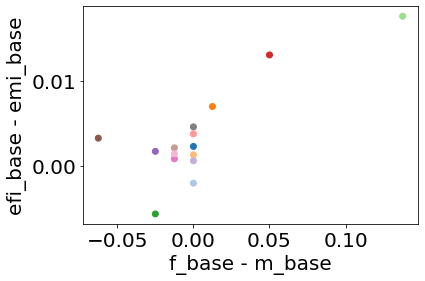

avg abs att
0.1766666666666667
0.010972044337540864
KendalltauResult(correlation=0.6761904761904762, pvalue=0.00019989992034469547)
0.1336306209562122
(0.7559289460184545, 0.006600273191928866)
[0.1375, 0.025, 0.09999999999999998, -0.07500000000000001, -0.05, 0.6375000000000001, 0.49999999999999994, -0.30000000000000004, -0.025000000000000022, -0.15000000000000002, -0.13750000000000007, 0.07499999999999996, -0.1875, -0.11249999999999999, 0.13750000000000007] [0.019427333027124405, -0.000693627446889878, 0.017280518263578418, 0.005119109898805619, 0.0012289248406887054, 0.035542032122612, 0.023239743988960983, -0.018053817749023437, 0.00615009143948555, 0.001062157750129699, 0.002960795909166336, 0.015511560440063478, -0.012627045810222625, 0.004589000716805457, 0.0010949056595563889]


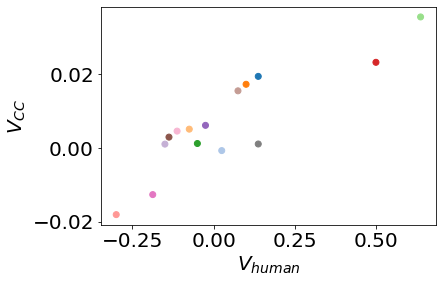

dalle
male
female
avg abs base
0.05083333333333333
0.00567994427556793
KendalltauResult(correlation=0.4134806532087095, pvalue=0.032910073123526694)
0.37796447300922725
(0.7321428571428571, 0.003837749518454073)


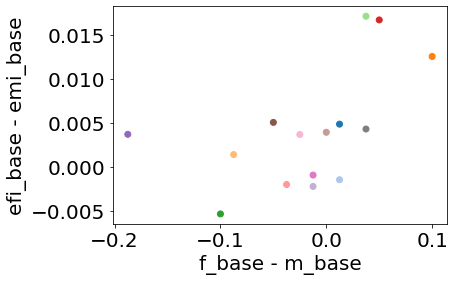

avg abs att
0.11749999999999998
0.010374047458171843
KendalltauResult(correlation=0.32853692020305414, pvalue=0.09126183657556931)
0.2
(0.7071067811865475, 0.013047136247158059)
[0.07499999999999996, -0.13750000000000007, -0.025000000000000022, -0.012500000000000067, -0.17500000000000004, 0.875, 0.1875, -0.012499999999999956, -0.025000000000000022, 0.025000000000000022, -0.012499999999999956, -0.050000000000000044, -0.0625, -0.050000000000000044, 0.03749999999999998] [0.015355771780014037, -0.011540633440017697, 0.012012746930122373, 0.0032591879367828355, -0.010167604684829714, 0.03574353903532028, 0.016167259216308592, -0.0038110166788101196, 0.011367665231227874, 0.0060785472393035875, -0.002522863447666168, 0.004647758603096009, 0.012746691703796387, 0.005656158924102782, -0.004533267021179198]


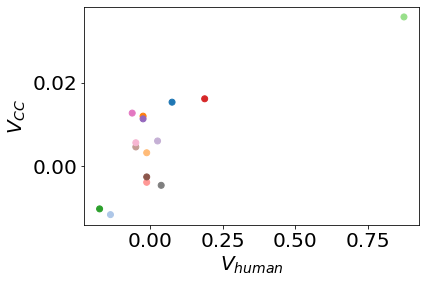

stable
male
female
tensor([-0.0531, -0.0521, -0.0670, -0.0658, -0.0392, -0.0022, -0.0227, -0.0033,
        -0.0115, -0.0079, -0.0207, -0.0023,  0.0016, -0.0180, -0.0053,  0.0153,
        -0.0095,  0.0069,  0.0162, -0.0023, -0.0216, -0.0267, -0.0043, -0.0206,
        -0.0412,  0.0179,  0.0066,  0.0137, -0.0069, -0.0223, -0.0239, -0.0109,
        -0.0119, -0.0018, -0.0218,  0.0183, -0.0203, -0.0194, -0.0324,  0.0053,
        -0.0215, -0.0254, -0.0118, -0.0237, -0.0224, -0.0235, -0.0112, -0.0040,
        -0.0243, -0.0161, -0.0256, -0.0420, -0.0260, -0.0207, -0.0221, -0.0171,
        -0.0259, -0.0470, -0.0367, -0.0455,  0.0023,  0.0028,  0.0238, -0.0006,
         0.0015, -0.0048, -0.0258, -0.0488, -0.0588, -0.0394, -0.0264, -0.0296,
        -0.0295, -0.0251, -0.0319, -0.0087, -0.0022,  0.0012, -0.0119, -0.0002,
         0.0012, -0.0136,  0.0108, -0.0085, -0.0009, -0.0106,  0.0225,  0.0128,
        -0.0166, -0.0191,  0.0461,  0.0300,  0.0023,  0.0176,  0.0036,  0.0883,
         0.0409,  0.0

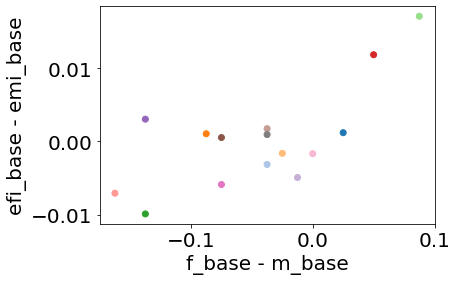

avg abs att
0.13749999999999998
0.006578328857819238
KendalltauResult(correlation=0.49040728636381825, pvalue=0.011404656359906139)
0.49099025303098287
(0.5640760748177662, -0.0057109031528234395)
[0.08750000000000002, 0.1375, -0.012499999999999956, -0.08750000000000002, -0.15000000000000002, 0.6375, 0.16249999999999998, -0.16249999999999998, -0.012500000000000067, -0.04999999999999993, -0.012500000000000067, 0.07499999999999996, -0.35000000000000003, 0.03749999999999998, 0.08750000000000002] [0.0029315486550331137, 0.00015621855854988133, 0.013437771797180174, -0.0016111254692077644, -0.012330675870180129, 0.024466871470212936, -0.0035789787769317585, -0.014222583174705504, 0.0007646873593330382, -0.005838075280189509, 0.0014904625713825226, 0.00012413859367370328, -0.01403138265013695, 0.0006895929574966403, 0.003000819683074951]


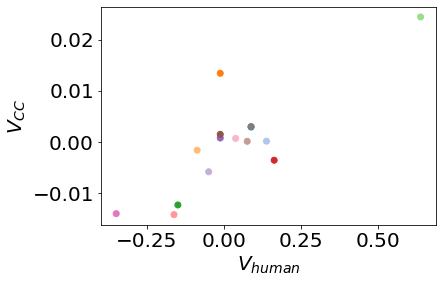

In [135]:
detection_query = ['an object', 'boots', 'slippers', 'jeans', 'shorts', 'slacks', 'a dress', 'a skirt', 'a suit', 'a shirt', 'uniform', 'a jacket', 'a hat', 'a tie', 'a mask', 'gloves']
d_texts = clip.tokenize(detection_query).to(device)
detection_fea = model.encode_text(d_texts).to(device).float()
detection_fea = detection_fea / detection_fea.norm(dim=1, keepdim=True)
print(detection_fea.shape)

filter_query = ['', 'a person']
f_texts = clip.tokenize(filter_query).to(device)
filter_fea = model.encode_text(f_texts).to(device).float()
filter_fea = filter_fea / filter_fea.norm(dim=1, keepdim=True)
print(filter_fea.shape)

x_list1 = []
y_list1 = []

for idx in range(3):
    print(idx_to_name[idx])

    detection_res_male_base = []
    detection_res_female_base = []
    detection_res_male_att = []
    detection_res_female_att = []

    att_auc = {'male':[], 'female':[]}
    mix_gender_true = [[] for _ in range(15)]
    mix_gender_pred = [[] for _ in range(15)]
    mix_gender_auc = []


    for gender, img_fea in (('male', m_imgs[idx]), ('female', f_imgs[idx])):
        print(gender)
        for i in range(1, 16):
            c_query = torch.cat([detection_fea[0].unsqueeze(0), detection_fea[i].unsqueeze(0)], dim=0)
            c_keys = torch.cat([img_fea[:16], img_fea[16 * i:16 * (i + 1)]], dim=0).view(160, -1)
            # print(c_query.shape, c_keys.shape)
            res = c_query @ c_keys.T

            fil = filter_fea @ c_keys.T
            # fil = fil[1] - fil[0]
            # print(res.shape)
            # print(res)
            # detection = res[1] > res[0]
            # detection = res[1]
            detection = res[1] - res[0]
            # detection = detection * fil

            # print(detection.shape)
            # print(fil.shape)
            # print(torch.sum(fil))
            att_auc[gender].append(roc_auc_score(ground_truths[idx][gender][i - 1].tolist(), detection.tolist()))
            mix_gender_true[i - 1].extend(ground_truths[idx][gender][i - 1].tolist())
            mix_gender_pred[i - 1].extend(detection.tolist())

            """
            if idx == 2 and i == 3:
                jeans_list.append(detection[80:].tolist())
            """

            if idx == 2:
                if gender == 'female' and i == 5:
                    print(detection)
                    # print(test)
                y_list1.append(ground_truths[idx][gender][i - 1].tolist())
                x_list1.append(detection.tolist())

            if gender == 'male':
                detection_res_male_base.append(torch.sum(detection[:80]).item() / 80.0)
                detection_res_male_att.append(torch.sum(detection[80:]).item() / 80.0)
            else:
                detection_res_female_base.append(torch.sum(detection[:80]).item() / 80.0)
                detection_res_female_att.append(torch.sum(detection[80:]).item() / 80.0)
    # print(detection_res_female_base)
    # print(detection_res_male_base)
    # print(detection_res_female_att)
    # print(detection_res_male_att)

    # print(att_auc['male'])
    # print(np.mean(att_auc['male']))
    # print(att_auc['female'])
    # print(np.mean(att_auc['female']))
    for i in range(15):
        mix_gender_auc.append(roc_auc_score(mix_gender_true[i], mix_gender_pred[i]))
    # print(mix_gender_auc)
    # auc_list.append(mix_gender_auc)
    # print(np.mean(mix_gender_auc))

    import matplotlib.pyplot as plt
    import numpy as np

    """
    x = np.array(f_bases[idx])
    y = np.array(detection_res_female_base)
    #find line of best fit
    a, b = np.polyfit(x, y, 1)

    print(kendalltau(x, y))

    plt.scatter(x, y)
    # plt.plot(x, a*x+b, color='green', linestyle='-', linewidth=1)
    plt.xlabel('f_base')
    plt.ylabel('efi_base')
    plt.show()

    x = np.array(m_bases[idx])
    y = np.array(detection_res_male_base)
    #find line of best fit
    a, b = np.polyfit(x, y, 1)

    print(kendalltau(x, y))

    plt.scatter(x, y)
    # plt.plot(x, a*x+b, color='green', linestyle='-', linewidth=1)
    plt.xlabel('m_base')
    plt.ylabel('emi_base')
    plt.show()

    x = np.array(f_atts[idx])
    y = np.array(detection_res_female_att)
    #find line of best fit
    a, b = np.polyfit(x, y, 1)

    print(kendalltau(x, y))

    plt.scatter(x, y)
    # plt.plot(x, a*x+b, color='green', linestyle='-', linewidth=1)
    plt.xlabel('f_att')
    plt.ylabel('efi_att')
    plt.show()

    x = np.array(m_atts[idx])
    y = np.array(detection_res_male_att)
    #find line of best fit
    a, b = np.polyfit(x, y, 1)

    print(kendalltau(x, y))

    plt.scatter(x, y)
    # plt.plot(x, a*x+b, color='green', linestyle='-', linewidth=1)
    plt.xlabel('m_att')
    plt.ylabel('emi_att')
    plt.show()
    """

    x = np.array([f_bases[idx][i] - m_bases[idx][i] for i in range(15)])
    y = np.array([detection_res_female_base[i] - detection_res_male_base[i] for i in range(15)])
    #find line of best fit
    a, b = np.polyfit(x, y, 1)
    print("avg abs base")
    print(np.mean(np.abs(x)))
    print(np.mean(np.abs(y)))

    print(kendalltau(x, y))
    print(matthews_corrcoef(to_binary(x), to_binary(y)))
    print(dynamic_mcc(x, y))

    plt.scatter(x, y, color=color_list)
    # plt.plot(x, a*x+b, color='green', linestyle='-', linewidth=1)
    plt.xlabel('f_base - m_base')
    plt.ylabel('efi_base - emi_base')
    plt.show()


    x = np.array([f_atts[idx][i] - m_atts[idx][i] for i in range(15)])
    y = np.array([detection_res_female_att[i] - detection_res_male_att[i] for i in range(15)])
    #find line of best fit
    a, b = np.polyfit(x, y, 1)
    print("avg abs att")
    print(np.mean(np.abs(x)))
    print(np.mean(np.abs(y)))

    print(kendalltau(x, y))
    print(matthews_corrcoef(to_binary(x), to_binary(y)))
    print(dynamic_mcc(x, y))

    print(x.tolist(), y.tolist())

    plt.scatter(x, y, color=color_list)
    # plt.plot(x, a*x+b, color='green', linestyle='-', linewidth=1)
    plt.xlabel(r'$V_{human}$')
    plt.ylabel(r'$V_{CC}$')
    plt.show()

In [136]:
x_list1 = np.array(x_list1)
y_list1 = np.array(y_list1)
print(x_list1.shape, y_list1.shape)

(30, 160) (30, 160)


In [137]:
# xc = x_list1.reshape(2, 15, 160)
# yc = y_list1.reshape(2, 15, 160)

xcc = x_list1.reshape(2, 15, 160)
ycc = y_list1.reshape(2, 15, 160)

In [ ]:
print(np.mean(jeans_list[0]), np.mean(jeans_list[1]))

In [30]:
print(coco_captions[:100])

[' is reaching up toward a ball with a racket', ' with a tie sitting at a table with a drink.', ' in a white shirt and a tie.', ' swinging a tennis racquet at a ball on a court.', ' holding a slice of pizza near her face.', ' is throwing something in a game', ' walking down the street with no shirt pulling luggage.', ' pitches a ball to another payer ont he field', ' with no shirt or pants holds onto a canned drink while watching his phone', ' in a classroom looking at a cell phone.\\n', ' riding a wave on top of a surfboard.', ' sitting with her legs crossed and luggage behind her. ', ' wearing a blue and black racing suit racing a blue and black motorcycle. ', ' holding a white cat on a couch', ' riding a skateboard on top of a ramp.', ' sitting next to a beautiful girl on a beach.', ' standing up in a baseball field with a bat', ' sitting on a wall next to bike holding a laptop.', ' playing on a wii system with a little girl.', ' pointing at a street sign above his head. ', ' is sta

In [31]:
random_contexts_from_coco = [' playing frisbee on green grass.',
                   ' holding a stuffed bear.',
                   ' sitting in the sand on a beach',
                   ' throwing something in a game',
                   ' walking down the street.',
                   ' at the open door of a airplane.',
                   ' looking at a cell phone.',
                   ' riding a wave on top of a surfboard.',
                   ' sitting with her legs crossed.',
                   ' racing a blue and black motorcycle.',
                   ' holding a white cat on a couch.',
                   ' sitting next to a beautiful girl.',
                   ' practicing golf on the green.',
                   ' pointing at a street sign.',
                   ' getting ready to fly a kite outdoors.',
                   ' walking an elephant in a courtyard.']

#### Metric 3

51946
[' is reaching up toward a ball with a racket', ' with a tie sitting at a table with a drink.']
48
768


  0%|          | 0/96 [00:00<?, ?it/s]

torch.Size([768, 768])


  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([1, 768])
1
dalle
[-0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
[0.8, 0.0, -0.2, -0.3, -0.7, 0.9, 0.4, -0.5, -0.1, 0.2, 0.6, 0.7, -0.9, -0.6, 0.5]
torch.Size([1200, 768]) torch.Size([1200, 768])
2
stable
[-0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
[-0.4, 0.0, 0.1, 0.8, 0.2, 0.9, -0.3, 0.3, 0.6, -0.5, -0.6, 0.7, -0.7, -0.8, 0.4]
torch.Size([1200, 768]) torch.Size([1200, 768])
3
dalle
[-0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
[0.8, 0.3, 0.1, 0.6, -0.9, 0.7, -0.5, -0.2, 0.4, -0.4, -0.8, 0.2, -0.3, 0.9, 0.0]
torch.Size([1200, 768]) torch.Size([1200, 768])
4
stable
[-0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
[0.4, 0.0, -0.8, -0.6, -0.7, -0.2, 0.8, 0.2, 0.7, 0.5, -0.4, -0.1, 0.3, 0.9, -0.3]
torch.Size([1200, 768]) torch.Size([1200, 768])
5
d

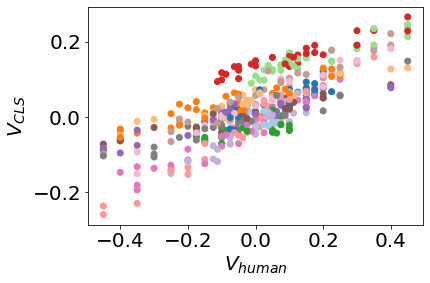

dalle
600 600
0.7796373012330647
0.692522119215025
0.7470261727517731
inter kt 0.7460767470450635 upperboud 0.9669432141547335
inter kt 0.22831337486306638 upperboud 0.2549918049665775


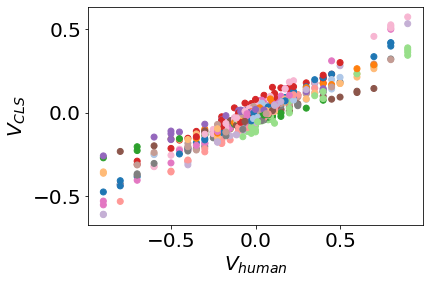

stable
600 600
0.7475189741085995
0.7248792246439989
0.7248792246439989
inter kt 0.7151692759311125 upperboud 0.9668878059270667
inter kt 0.21955837086489582 upperboud 0.2552018235623385


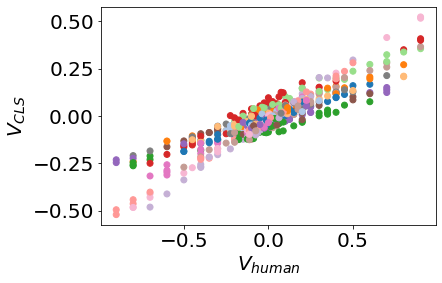

'\n                app_crr_res[app][idx][0].append(kendalltau(x, y).correlation)\n                app_crr_res[app][idx][1].append(matthews_corrcoef(to_binary(x), to_binary(y)))\n                app_crr_res[app][idx][2].append(dynamic_mcc(x, y)[0])\n\n    print("Result:", scalar)\n    for idx in range(model_idx, 3):\n        print(idx_to_name[idx])\n        for app in range(1):\n            print(np.mean(app_crr_res[app][idx][0]), np.mean(app_crr_res[app][idx][1]), np.mean(app_crr_res[app][idx][2]))\n'

In [104]:
from tqdm.notebook import tqdm, trange
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

coco_captions = []
with open("/home/xuhui/github/rationale/Code/coco_contexts.txt", "r") as txt_file:
  coco_captions = txt_file.readlines()
print(len(coco_captions))
coco_captions = [caption[:-1] for caption in coco_captions]
np.random.seed(0)
np.random.shuffle(coco_captions)
print(coco_captions[:2])

# people = ['A man', 'A woman', 'A person', 'A teacher', 'A doctor']
people = ['A man', 'A woman', 'A person']
# people = ['A man', 'A woman']
# people = ['A person']

attribute_set = ['',
                 ' in boots', 
                 ' in slippers', 
                 ' in jeans',
                 ' in shorts',
                 ' in slacks',
                 ' in a dress',
                 ' in a skirt',
                 ' in a suit',
                 ' in a shirt',
                 ' in uniform',
                 ' in a jacket',
                 ' in a hat',
                 ' with a tie',
                 ' with a mask',
                 ' with gloves'
]
contexts = [' sitting at a table.',
            ' sitting on a bed.',
            ' standing on a skateboard.',
            ' standing next to a rack.',
            ' riding a bike.',
            ' riding a horse.',
            ' laying on the snow.',
            ' laying on a couch.',
            ' walking through a forest.',
            ' walking down a sidewalk.',
            ' holding up a smartphone.',
            ' holding an umbrella.',
            ' jumping into the air.',
            ' jumping over a box.',
            ' running across the park.',
            ' running on the beach.']
# contexts = random_contexts_from_coco

len_con = len(contexts) * len(people)
text_list = [person + item + context for item in attribute_set for context in contexts for person in people]
print(len_con)
print(len(text_list))

@torch.no_grad()
def get_text_feature(text_list):
    text_features = []
    for batch_idx in trange(0, len(text_list), 8):
        c_texts = [text_list[idx] for idx in range(batch_idx, min(batch_idx + 8, len(text_list)))]
        text_input = clip.tokenize(c_texts).to(device)
        text_features.append(model.encode_text(text_input).to(device).float())
    return torch.cat(text_features, dim=0)

text_fes = get_text_feature(text_list)
print(text_fes.shape)
with torch.no_grad():
    text_fes = text_fes / text_fes.norm(dim=1, keepdim=True)

# baseline for calibration
base_fes = get_text_feature([''])
print(base_fes.shape)
with torch.no_grad():
    base_fes = base_fes / base_fes.norm(dim=1, keepdim=True)

app_crr_res_1 = [[[[], []], [[], []], [[], []]], [[[], []], [[], []], [[], []]], [[[], []], [[], []], [[], []]]]

for scalar, model_idx in [(1.0, 1), (0.5, 0), (0.25, 0), (0.125, 0)]:
    times = 10
    shuffle_seed = 0

    np.random.seed(shuffle_seed)

    # app_crr_res = [[[[], [], []], [[], [], []], [[], [], []]], [[[], [], []], [[], [], []], [[], [], []]], [[[], [], []], [[], [], []], [[], [], []]]]

    cc = 0
    for cnt in range(times):
        for idx in range(model_idx, 3):
            cc += 1
            print(cc)

            print(idx_to_name[idx])
            final_random_bias, f_test_img_fes, m_test_img_fes = get_random_test_features(idx_to_name[idx], res_nps[idx], scalar=scalar)

            for app in range(1):
                male_res_add = [[] for _ in range(15)]
                female_res_add = [[] for _ in range(15)]

                inner_times = 10
                # ablation
                # inner_times = 5

                for gender, img_fea in (('male', m_test_img_fes), ('female', f_test_img_fes)):
                    res_add = [[] for _ in range(15)]

                    for trial in range(inner_times):
                        for i in range(1, 16):
                            # print(text_list[i * 5])
                            zero_features = text_fes[:len_con]
                            one_features = text_fes[len_con * i: len_con * i + len_con]
                            features = torch.cat([zero_features, one_features], dim=0).cpu().numpy()
                            labels = np.array([0] * len_con + [1] * len_con)

                            test_feature = img_fea[80 * (i - 1):80 * i].view(80, -1).cpu().numpy()

                            X = features
                            Y = labels
                            clf = make_pipeline(SGDClassifier(max_iter=5000, loss='log_loss', tol=1e-3, random_state=trial, validation_fraction=0.1, early_stopping=True))
                            clf.fit(X, Y)

                            pred = clf.predict_proba(test_feature)[:, 1]
                            bias = clf.predict_proba(base_fes.cpu().numpy())[0][1]
                            # if idx == 1 and app == 0 and trial == 0 and i == 1:
                            #     print(bias)
                            if app == 0:
                                pred = pred
                            elif app == 1:
                                pred = pred - bias
                            elif app == 2:
                                pred = pred > bias

                            res_add[i - 1].append(np.mean(pred, axis=0))
                    res_add = [np.mean(np.array(item), axis=0) for item in res_add]

                    if gender == 'male':
                        male_res_add = res_add
                    elif gender == 'female':
                        female_res_add = res_add

                x = np.array(np.array(final_random_bias))
                y = np.array([female_res_add[i] - male_res_add[i] for i in range(15)])

                app_crr_res_1[app][idx][0].extend(x.tolist())
                app_crr_res_1[app][idx][1].extend(y.tolist())

cogview2
450 450
0.5899160643071086
0.5197873294803735
0.5447434645134068
inter kt 0.5613070512989491 upperboud 0.9677348262605996
intra kt 0.18508734477128047 upperboud 0.25197084363546324
inter kt norm 0.5800215472950186 upperboud 0.9999999999999998
intra kt norm 0.7345585786864057 upperboud 1.0


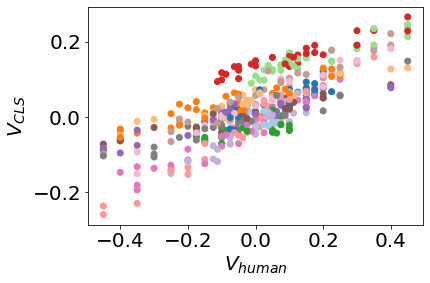

dalle
600 600
0.7796373012330647
0.692522119215025
0.7470261727517731
inter kt 0.7460767470450635 upperboud 0.9669432141547335
intra kt 0.22831337486306638 upperboud 0.2549918049665775
inter kt norm 0.7715827942360158 upperboud 1.0
intra kt norm 0.8953753431134466 upperboud 0.9999999999999999


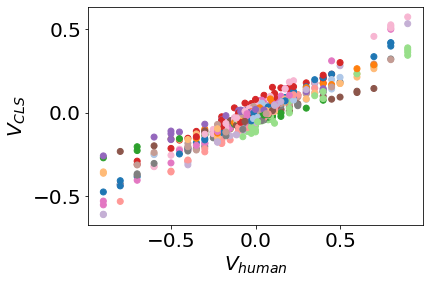

stable
600 600
0.7475189741085995
0.7248792246439989
0.7248792246439989
inter kt 0.7151692759311125 upperboud 0.9668878059270667
intra kt 0.21955837086489582 upperboud 0.2552018235623385
inter kt norm 0.739661077063018 upperboud 1.0
intra kt norm 0.8603322962199131 upperboud 1.0000000000000002


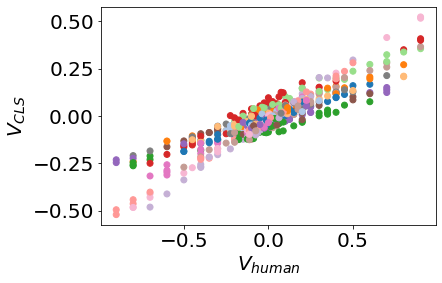

In [109]:
group_list = [i for i in range(15)]
# print("Result:", scalar)
for idx in range(0, 3):
    print(idx_to_name[idx])
    for app in range(1):
        print(len(app_crr_res_1[app][idx][0]), len(app_crr_res_1[app][idx][1]))
        x = np.array(app_crr_res_1[app][idx][0])
        y = np.array(app_crr_res_1[app][idx][1])
        print(kendalltau(x, y).correlation)
        print(matthews_corrcoef(to_binary(x), to_binary(y)))
        print(dynamic_mcc(x, y)[0])

        cc = int(x.shape[0] / 15)
        assert cc == 30 or cc == 40

        print("inter kt", inter_kt(x, y, group_list * cc), "upperboud", inter_kt(x, x, group_list * cc))
        print("intra kt", intra_kt(x, y, group_list * cc), "upperboud", intra_kt(x, x, group_list * cc))
        print("inter kt norm", inter_kt_norm(x, y, group_list * cc), "upperboud", inter_kt_norm(x, x, group_list * cc))
        print("intra kt norm", intra_kt_norm(x, y, group_list * cc), "upperboud", intra_kt_norm(x, x, group_list * cc))

        plt.scatter(x, y, color=color_list * int(cc))
        # plt.plot(x, a*x+b, color='green', linestyle='-', linewidth=1)
        plt.xlabel(r'$V_{human}$')
        plt.ylabel(r'$V_{CLS}$')
        plt.show()

In [110]:
for app in range(1):
    group_list = [0] * 450 + [1] * 600 + [2] * 600
    x = np.array(app_crr_res_1[app][0][0] + app_crr_res_1[app][1][0] + app_crr_res_1[app][2][0])
    y = np.array(app_crr_res_1[app][0][1] + app_crr_res_1[app][1][1] + app_crr_res_1[app][2][1])
    print(x.shape, y.shape, x[:10], y[:10])
    print(kendalltau(x, y))
    print(matthews_corrcoef(to_binary(x), to_binary(y)))
    print(dynamic_mcc(x, y)[0])
    print("inter kt norm", inter_kt_norm(x, y, group_list), "upperboud", inter_kt_norm(x, x, group_list))
    print("intra kt norm", intra_kt_norm(x, y, group_list), "upperboud", intra_kt_norm(x, x, group_list))

(1650,) (1650,) [-0.1   0.   -0.25  0.45 -0.15  0.3   0.2  -0.45 -0.35  0.1 ] [ 0.01 -0.02 -0.03  0.13 -0.06  0.19  0.17 -0.26 -0.08 -0.01]
KendalltauResult(correlation=0.7070414425895932, pvalue=0.0)
0.6534250034536169
0.6534250034536169
inter kt norm 0.6975658544741772 upperboud 0.9999999999999999
intra kt norm 0.7255576011732255 upperboud 1.0


In [1]:
from tqdm.notebook import tqdm, trange
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

coco_captions = []
with open("/home/xuhui/github/rationale/Code/coco_contexts.txt", "r") as txt_file:
  coco_captions = txt_file.readlines()
print(len(coco_captions))
coco_captions = [caption[:-1] for caption in coco_captions]
np.random.seed(0)
np.random.shuffle(coco_captions)
print(coco_captions[:2])

# people = ['A man', 'A woman', 'A person', 'A teacher', 'A doctor']
# people = ['A man', 'A woman', 'A person']
# people = ['A man', 'A woman']
# people = ['A person']
people = ['A person', 'A software engineer', 'An Asian software engineer', 'An African software engineer']

attribute_set = ['',
                 # ' in a dress',
                 ' in a suit',
                 ' in a shirt',
                 ' with a tie',
                 ' in glasses'
]
contexts = [' sitting at a table.',
            ' working in a law firm.',
            ' working on a computer.',
            ' coding on a computer.',
            ' reading a book.',
            ' writting on a paper.',
            ' smiling.',
            ' standing with crossed arms.']
"""
contexts = [' sitting at a table.',
            ' sitting on a bed.',
            ' standing on a skateboard.',
            ' standing next to a rack.',
            ' riding a bike.',
            ' riding a horse.',
            ' laying on the snow.',
            ' laying on a couch.',
            ' walking through a forest.',
            ' walking down a sidewalk.',
            ' holding up a smartphone.',
            ' holding an umbrella.',
            ' jumping into the air.',
            ' jumping over a box.',
            ' running across the park.',
            ' running on the beach.']
# """
# contexts = coco_captions[:1000]

len_con = len(contexts) * len(people)
text_list = [person + item + context for item in attribute_set for context in contexts for person in people]
print(len_con)
print(len(text_list))

@torch.no_grad()
def get_text_feature(text_list):
    text_features = []
    for batch_idx in trange(0, len(text_list), 8):
        c_texts = [text_list[idx] for idx in range(batch_idx, min(batch_idx + 8, len(text_list)))]
        text_input = clip.tokenize(c_texts).to(device)
        text_features.append(model.encode_text(text_input).to(device).float())
    return torch.cat(text_features, dim=0)

text_fes = get_text_feature(text_list)
print(text_fes.shape)
with torch.no_grad():
    text_fes = text_fes / text_fes.norm(dim=1, keepdim=True)

# baseline for calibration
base_fes = get_text_feature([''])
print(base_fes.shape)
with torch.no_grad():
    base_fes = base_fes / base_fes.norm(dim=1, keepdim=True)

inner_times = 10
span = 20
cat = 7
res = [[[] for _ in range(len(attribute_set) - 1)] for ii in range(cat)]
for idx in range(cat):
    img_fea = bu_img_fes[idx * 20: (idx + 1) * 20]

    for trial in range(inner_times):
        for i in range(1, len(attribute_set)):
            # print(text_list[i * 5])
            zero_features = text_fes[:len_con]
            one_features = text_fes[len_con * i: len_con * i + len_con]
            features = torch.cat([zero_features, one_features], dim=0).cpu().numpy()
            labels = np.array([0] * len_con + [1] * len_con)

            test_feature = img_fea.cpu().numpy()

            X = features
            Y = labels
            clf = make_pipeline(SGDClassifier(max_iter=5000, loss='log_loss', tol=1e-3, random_state=trial, validation_fraction=0.1, early_stopping=True))
            clf.fit(X, Y)

            pred = clf.predict_proba(test_feature)[:, 1]
            res[idx][i - 1].append(np.mean(pred, axis=0))

res = np.array(res)
print(res.shape)
res = np.mean(res, axis=2)
print(res)

51946
[' is reaching up toward a ball with a racket', ' with a tie sitting at a table with a drink.']
32
160


NameError: name 'torch' is not defined

In [250]:
# lawyer
attribute_set = ['',
                 ' in a suit',
                 ' in a shirt',
                 ' with a tie',
                 ' in glasses'
]
contexts = [' sitting at a table.',
            ' working in a law firm.',
            ' working on a computer.',
            ' coding on a computer.',
            ' reading a book.',
            ' writting on a paper.',
            ' smiling.',
            ' standing with crossed arms.']

In [251]:
def get_avg_abs(alist, idx1, idx2):
    print(np.mean(np.abs(alist[idx1] - alist[idx2])))

get_avg_abs(res, 0, 1)
get_avg_abs(res, 0, 2)
get_avg_abs(res, 0, 3)

get_avg_abs(res, 4, 5)
get_avg_abs(res, 4, 6)

0.031199133194805245
0.05223830796810672
0.03493631951814136
0.0491968842897955
0.07772421584369071


# Original

In [34]:
import numpy as np

coco_captions = []
with open("/home/xuhui/github/rationale/Code/coco_contexts.txt", "r") as txt_file:
  coco_captions = txt_file.readlines()
print(len(coco_captions))
coco_captions = [caption[:-1] for caption in coco_captions]
np.random.seed(0)
np.random.shuffle(coco_captions)
print(coco_captions[:2])

51946
[' is reaching up toward a ball with a racket', ' with a tie sitting at a table with a drink.']


In [35]:
from tqdm.notebook import tqdm, trange

# people = ['A man', 'A woman', 'A person', 'A teacher', 'A doctor', 'A lawyer']
# people = ['A man', 'A woman', 'A person', 'A teacher', 'A doctor', 'An assistant', 'A cook', 'An engineer', 'A farmer', 'A lecturer']
people = ['A man', 'A woman', 'A person']
# people = ['A man', 'A woman', 'A person', 'A male', 'A female']

attribute_set = ['',
                 ' in boots', 
                 ' in slippers', 
                 ' in jeans',
                 ' in shorts',
                 ' in slacks',
                 ' in a dress',
                 ' in a skirt',
                 ' in a suit',
                 ' in a shirt',
                 ' in uniform',
                 ' in a jacket',
                 ' in a hat',
                 ' with a tie',
                 ' with a mask',
                 ' with gloves'
]
contexts = [' sitting at a table.',
            ' sitting on a bed.',
            ' standing on a skateboard.',
            ' standing next to a rack.',
            ' riding a bike.',
            ' riding a horse.',
            ' laying on the snow.',
            ' laying on a couch.',
            ' walking through a forest.',
            ' walking down a sidewalk.',
            ' holding up a smartphone.',
            ' holding an umbrella.',
            ' jumping into the air.',
            ' jumping over a box.',
            ' running across the park.',
            ' running on the beach.']
# contexts = coco_captions[:1000]

len_con = len(contexts) * len(people)
text_list = [person + item + context for item in attribute_set for context in contexts for person in people]
print(len_con)
print(len(text_list))

@torch.no_grad()
def get_text_feature(text_list):
    text_features = []
    for batch_idx in trange(0, len(text_list), 8):
        c_texts = [text_list[idx] for idx in range(batch_idx, min(batch_idx + 8, len(text_list)))]
        text_input = clip.tokenize(c_texts).to(device)
        text_features.append(model.encode_text(text_input).to(device).float())
    return torch.cat(text_features, dim=0)


# text_fes = get_feature_from_prior(text_list)
text_fes = get_text_feature(text_list)
print(text_fes.shape)
with torch.no_grad():
    text_fes = text_fes / text_fes.norm(dim=1, keepdim=True)

48
768


  0%|          | 0/96 [00:00<?, ?it/s]

torch.Size([768, 768])


In [36]:
base_fes = get_text_feature(['a person'])
print(base_fes.shape)
with torch.no_grad():
    base_fes = base_fes / base_fes.norm(dim=1, keepdim=True)

  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([1, 768])


# Original Feature

In [38]:
# auc_list = auc_list[:6]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

[0.89 0.97 0.79 0.85 0.77 0.99 0.86 0.98 0.79 0.93 0.83 0.85 0.94 0.92
 0.92]
0.8861805080294951
[0.81 0.89 0.9  0.82 0.68 0.87 0.87 0.92 0.76 0.88 0.8  0.95 0.89 0.92
 0.79]
0.8504583878353472
15
150
[0.85 0.93 0.84 0.83 0.72 0.93 0.86 0.95 0.77 0.9  0.81 0.9  0.92 0.92
 0.85]
0.8645172148836057
avg abs att
0.023333333333333334
0.03790036354237388
KendalltauResult(correlation=0.49935022714588745, pvalue=0.013554666064815549)
0.16666666666666666
(0.5773502691896257, 0.02708710062691097)


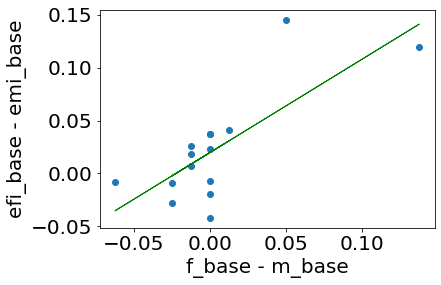

avg abs att
0.1766666666666667
0.09256969483360347
[ 0.14  0.03  0.1  -0.08 -0.05  0.64  0.5  -0.3  -0.03 -0.15 -0.14  0.07
 -0.19 -0.11  0.14] [ 0.1  -0.01  0.09  0.03 -0.04  0.31  0.26 -0.2   0.02 -0.05 -0.02  0.11
 -0.13 -0.    0.01]
KendalltauResult(correlation=0.7333333333333334, pvalue=3.702856397962218e-05)
0.6071428571428571
(0.7559289460184545, 0.03255188459646782)


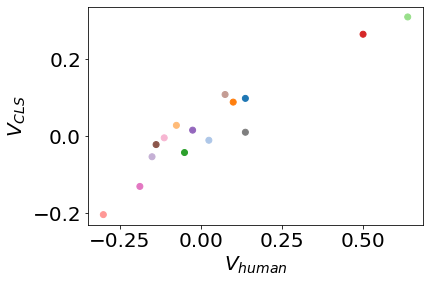

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

[0.96 0.94 0.97 0.97 0.92 0.95 0.99 0.99 0.89 0.99 0.88 0.94 0.99 0.99
 0.98]
0.9562994030479941
[0.98 0.87 0.97 0.95 0.86 0.99 0.97 0.99 0.89 0.98 0.9  0.93 0.99 0.99
 0.98]
0.9489143180603549
15
150
[0.97 0.9  0.96 0.96 0.88 0.97 0.98 0.99 0.89 0.99 0.88 0.93 0.99 0.99
 0.98]
0.9495128882203577
avg abs att
0.05083333333333333
0.042634580390866685
KendalltauResult(correlation=0.567333919518927, pvalue=0.0034233741662828506)
0.600099198148979
(0.6614378277661477, -0.03252997622304113)


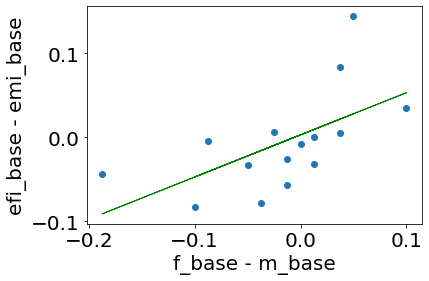

avg abs att
0.11749999999999998
0.05184313349828935
[ 0.07 -0.14 -0.03 -0.01 -0.18  0.88  0.19 -0.01 -0.03  0.03 -0.01 -0.05
 -0.06 -0.05  0.04] [ 0.03 -0.05  0.   -0.06 -0.06  0.23  0.04 -0.05  0.02 -0.04 -0.04 -0.05
  0.04  0.03 -0.06]
KendalltauResult(correlation=0.23190841426097936, pvalue=0.2332302227821852)
0.18898223650461363
(0.4, 0.017925774132212132)


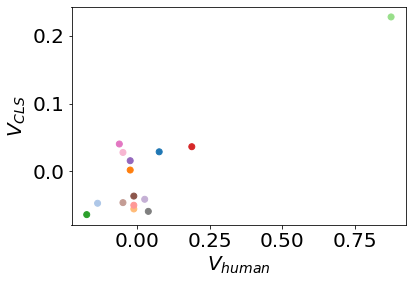

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

[0.28 0.4  0.22 0.27 0.3  0.51 0.39 0.44 0.33 0.6  0.37 0.31 0.39 0.37
 0.46 0.7  0.46 0.83 0.7  0.54 0.25 0.21 0.32 0.23 0.22 0.45 0.53 0.34
 0.25 0.32 0.31 0.46 0.49 0.39 0.29 0.69 0.42 0.4  0.55 0.63 0.38 0.36
 0.45 0.38 0.36 0.42 0.44 0.55 0.4  0.48 0.56 0.33 0.52 0.39 0.55 0.61
 0.45 0.6  0.43 0.34 0.41 0.74 0.74 0.36 0.57 0.42 0.66 0.41 0.23 0.31
 0.23 0.27 0.36 0.34 0.31 0.28 0.29 0.2  0.32 0.32 0.88 0.7  0.92 0.81
 0.8  0.51 0.76 0.64 0.44 0.51 0.89 0.7  0.69 0.57 0.57 0.92 0.94 0.94
 0.91 0.84 0.54 0.52 0.5  0.55 0.84 0.57 0.48 0.51 0.74 0.67 0.45 0.33
 0.32 0.29 0.45 0.71 0.75 0.6  0.79 0.78 0.58 0.52 0.56 0.71 0.73 0.89
 0.7  0.87 0.9  0.7  0.66 0.71 0.43 0.93 0.81 0.66 0.75 0.67 0.92 0.74
 0.85 0.71 0.88 0.96 0.96 0.87 0.92 0.81 0.91 0.84 0.4  0.31 0.53 0.53
 0.54 0.46 0.28 0.29 0.6  0.51]
[0.87 0.85 0.9  0.9  0.85 0.84 0.95 0.96 0.79 0.98 0.78 0.97 0.93 0.98
 0.82]
0.8908526677505068
[0.87 0.83 0.93 0.85 0.85 0.92 0.94 0.96 0.85 0.96 0.83 0.96 0.95 0.99
 0.84]
0.9015989662

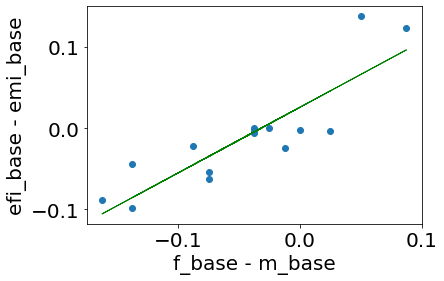

avg abs att
0.13749999999999998
0.06321537888340775
[ 0.09  0.14 -0.01 -0.09 -0.15  0.64  0.16 -0.16 -0.01 -0.05 -0.01  0.07
 -0.35  0.04  0.09] [-0.01  0.01  0.03 -0.03 -0.11  0.23  0.02 -0.12 -0.07 -0.07 -0.01 -0.06
 -0.16  0.01  0.03]
KendalltauResult(correlation=0.7019555275403673, pvalue=0.0002929645408835004)
0.600099198148979
(0.6614378277661477, -0.06276106366158228)


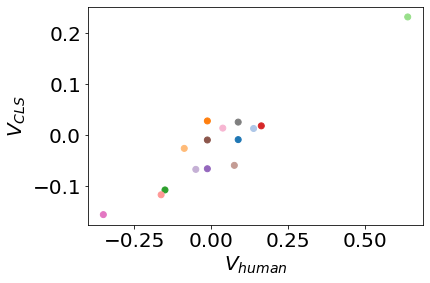

In [224]:
from tqdm.notebook import tqdm, trange
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)

y_list = []
x_list = []

for idx in range(3):

    male_res_base = [[] for _ in range(15)]
    male_res_add = [[] for _ in range(15)]
    female_res_base = [[] for _ in range(15)]
    female_res_add = [[] for _ in range(15)]

    lawyer_res_base = [[] for _ in range(15)]
    lawyer_res_add = [[] for _ in range(15)]

    att_auc = {'male':[], 'female':[]}
    mix_gender_true = [[] for _ in range(15)]
    mix_gender_pred = [[] for _ in range(15)]
    mix_gender_auc = []

    times = 10
    jeans_res = {'male':[], 'female':[]}

    # for gender, img_fea in (('male', m_img), ('female', f_img), (('lawyer', l_img))):
    for gender, img_fea in (('male', m_imgs[idx]), ('female', f_imgs[idx])):
        res_base = [[] for _ in range(15)]
        res_add = [[] for _ in range(15)]

        for trial in trange(times):
            for i in range(1, 16):
                # print(text_list[i * 5])
                zero_features = text_fes[:len_con]
                one_features = text_fes[len_con * i: len_con * i + len_con]
                features = torch.cat([zero_features, one_features], dim=0).cpu().numpy()
                labels = np.array([0] * len_con + [1] * len_con)

                base_feature = img_fea[:16].reshape(80, -1).cpu().numpy()
                one_feature = img_fea[16 * i:16 * (i + 1)].reshape(80, -1).cpu().numpy()
                test_feature = np.concatenate([base_feature, one_feature], axis=0)

                # base_feature = img_fea[i - 1 : i].reshape(5, -1).cpu().numpy()
                # one_feature = img_fea[i - 1 : i].reshape(5, -1).cpu().numpy()
                # test_feature = np.concatenate([base_feature, one_feature], axis=0)

                X = features
                Y = labels
                # Always scale the input. The most convenient way is to use a pipeline.
                # clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, loss='modified_huber', tol=1e-3))
                # clf = make_pipeline(SGDClassifier(max_iter=1000, loss='log_loss', tol=1e-3, validation_fraction=0.1, early_stopping=True))
                clf = make_pipeline(SGDClassifier(max_iter=5000, loss='log_loss', tol=1e-3, random_state=trial, validation_fraction=0.1, early_stopping=True))
                # clf = make_pipeline(KNeighborsClassifier(n_neighbors=5))
                # clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))
                clf.fit(X, Y)

                train_pred = clf.predict(features)
                acc = np.sum(labels == train_pred) / labels.shape[0]
                # print(acc)

                pred = clf.predict_proba(test_feature)[:, 1]
                # pred = pred / np.max(pred)
                # pred = clf.predict_proba(test_feature)[:, 1] - clf.predict_proba(base_fes.cpu().numpy())[0][1]
                """
                if idx == 0 and trial == 0 and i == 1:
                    print("calibrate")
                    print(clf.predict_proba(base_fes.cpu().numpy())[0][1])
                """

                res_base[i - 1].append(np.mean(pred[:80], axis=0))
                res_add[i - 1].append(np.mean(pred[80:], axis=0))
                
                if idx == 2:
                    if gender == 'female' and trial == 5 and i == 5:
                        print(pred)
                    y_list.append(ground_truths[idx][gender][i - 1].tolist())
                    x_list.append(pred.tolist())

                if i == 3 and idx == 2:
                    jeans_res[gender].append(pred[80:].tolist())
                
                # print(pred)
                att_auc[gender].append(roc_auc_score(ground_truths[idx][gender][i - 1].tolist(), pred))
                mix_gender_true[i - 1].extend(ground_truths[idx][gender][i - 1].tolist())
                mix_gender_pred[i - 1].extend(pred)

        res_base = [np.mean(np.array(item), axis=0) for item in res_base]
        res_add = [np.mean(np.array(item), axis=0) for item in res_add]

        if gender == 'male':
            male_res_base = res_base
            male_res_add = res_add
        elif gender == 'female':
            female_res_base = res_base
            female_res_add = res_add
        else:
            lawyer_res_base = res_base
            lawyer_res_add = res_add

    male_auc = np.mean(np.array(att_auc['male']).reshape(times, 15), axis=0)
    female_auc = np.mean(np.array(att_auc['female']).reshape(times, 15), axis=0)

    print(male_auc)
    print(np.mean(male_auc))
    print(female_auc)
    print(np.mean(female_auc))

    print(len(mix_gender_pred))
    for i in range(15):
        for j in range(times):
            # print(len(mix_gender_true[i]))
            mix_gender_auc.append(roc_auc_score(mix_gender_true[i][320 * j: 320 * (j + 1)], mix_gender_pred[i][320 * j: 320 * (j + 1)]))
    print(len(mix_gender_auc))
    print(np.mean(np.array(mix_gender_auc).reshape(15, times), axis=1))
    # auc_list.append(np.mean(np.array(mix_gender_auc).reshape(15, times), axis=1).tolist())
    print(np.mean(mix_gender_auc))

    """
    import matplotlib.pyplot as plt
    import numpy as np

    x = np.array(f_bases[idx])
    y = np.array(female_res_base)
    #find line of best fit
    a, b = np.polyfit(x, y, 1)

    print(kendalltau(x, y))

    plt.scatter(x, y)
    # plt.plot(x, a*x+b, color='green', linestyle='-', linewidth=1)
    plt.xlabel('f_base')
    plt.ylabel('efi_base')
    plt.show()

    x = np.array(m_bases[idx])
    y = np.array(male_res_base)
    #find line of best fit
    a, b = np.polyfit(x, y, 1)

    print(kendalltau(x, y))

    plt.scatter(x, y)
    # plt.plot(x, a*x+b, color='green', linestyle='-', linewidth=1)
    plt.xlabel('m_base')
    plt.ylabel('emi_base')
    plt.show()

    x = np.array(f_atts[idx])
    y = np.array(female_res_add)
    #find line of best fit
    a, b = np.polyfit(x, y, 1)

    print(kendalltau(x, y))

    plt.scatter(x, y)
    # plt.plot(x, a*x+b, color='green', linestyle='-', linewidth=1)
    plt.xlabel('f_att')
    plt.ylabel('efi_att')
    plt.show()

    x = np.array(m_atts[idx])
    y = np.array(male_res_add)
    #find line of best fit
    a, b = np.polyfit(x, y, 1)

    print(kendalltau(x, y))

    plt.scatter(x, y)
    # plt.plot(x, a*x+b, color='green', linestyle='-', linewidth=1)
    plt.xlabel('m_att')
    plt.ylabel('emi_att')
    plt.show()
    """

    x = np.array([f_bases[idx][i] - m_bases[idx][i] for i in range(15)])
    y = np.array([female_res_base[i] - male_res_base[i] for i in range(15)])
    #find line of best fit
    a, b = np.polyfit(x, y, 1)
    print("avg abs att")
    print(np.mean(np.abs(x)))
    print(np.mean(np.abs(y)))

    print(kendalltau(x, y))
    print(matthews_corrcoef(to_binary(x), to_binary(y)))
    print(dynamic_mcc(x, y))

    plt.scatter(x, y)
    plt.plot(x, a*x+b, color='green', linestyle='-', linewidth=1)
    plt.xlabel('f_base - m_base')
    plt.ylabel('efi_base - emi_base')
    plt.show()

    x = np.array([f_atts[idx][i] - m_atts[idx][i] for i in range(15)])
    y = np.array([female_res_add[i] - male_res_add[i] for i in range(15)])
    #find line of best fit
    a, b = np.polyfit(x, y, 1)
    print("avg abs att")
    print(np.mean(np.abs(x)))
    print(np.mean(np.abs(y)))

    print(x, y)

    print(kendalltau(x, y))
    print(matthews_corrcoef(to_binary(x), to_binary(y)))
    print(dynamic_mcc(x, y))

    plt.scatter(x, y, color=color_list)
    # plt.plot(x, a*x+b, color='green', linestyle='-', linewidth=1)
    plt.xlabel(r'$V_{human}$')
    plt.ylabel(r'$V_{CLS}$')
    plt.show()

In [79]:
jeans_list = jeans_list[:2]
jeans_list.append(np.mean(np.array(jeans_res['male']), axis=0))
jeans_list.append(np.mean(np.array(jeans_res['female']), axis=0))

print(np.mean(jeans_list[0]), np.mean(jeans_list[1]))
print(np.mean(jeans_list[2]), np.mean(jeans_list[3]))


NameError: name 'jeans_list' is not defined

In [87]:
x_list = np.array(x_list)
y_list = np.array(y_list)
print(x_list.shape, y_list.shape)

(300, 160) (300, 160)


In [89]:
x2 = x_list.reshape(2, 10, 15, 160)
y2 = y_list.reshape(2, 10, 15, 160)

x2 = np.mean(x2, axis=1)
y2 = np.mean(y2, axis=1)

In [112]:
print(xc.shape, x2.shape, yc.shape, y2.shape)

(2, 15, 160) (2, 15, 160) (2, 15, 160) (2, 15, 160)


In [207]:
print(np.mean(xcc[0][2][80:]), np.mean(xcc[1][2][80:]))
print(np.mean(x2[0][2][80:]), np.mean(x2[1][2][80:]))

0.00747485151514411 0.02091262359172106
0.6509991024340831 0.6790935514584071


In [219]:
np.set_printoptions(precision=3)
print(xcc[0][2][80:].reshape(-1, 10))
print(xcc[1][2][80:].reshape(-1, 10))

print(x2[0][2][80:].reshape(-1, 10))
print(x2[1][2][80:].reshape(-1, 10))

[[ 0.014  0.015 -0.025 -0.017 -0.014  0.071  0.    -0.015  0.026  0.064]
 [ 0.02   0.02  -0.004 -0.011 -0.011  0.053  0.052  0.031  0.069  0.051]
 [-0.031  0.011  0.038  0.035 -0.007  0.021  0.019  0.028  0.028  0.039]
 [-0.031  0.057  0.019 -0.01  -0.005  0.004  0.034 -0.019 -0.01   0.003]
 [ 0.007 -0.002 -0.012 -0.004 -0.007  0.035  0.056  0.001  0.01  -0.003]
 [-0.057 -0.011 -0.003 -0.039 -0.022 -0.029 -0.021 -0.002 -0.014 -0.001]
 [ 0.047  0.022  0.017  0.048  0.036 -0.035  0.04   0.007 -0.001 -0.033]
 [-0.016 -0.005 -0.011  0.009 -0.014 -0.026  0.017 -0.017  0.028 -0.006]]
[[ 0.085  0.013 -0.005 -0.005 -0.01   0.089  0.046  0.018  0.075  0.064]
 [ 0.032  0.013  0.053  0.001 -0.001  0.068  0.073  0.04   0.088  0.027]
 [-0.011  0.026  0.021  0.04  -0.007  0.026  0.047  0.061  0.052  0.036]
 [-0.015  0.029  0.055  0.056 -0.     0.045  0.001  0.033 -0.007  0.007]
 [ 0.002  0.011  0.008 -0.005  0.003  0.01   0.018  0.023  0.013  0.012]
 [-0.029  0.004 -0.005  0.037 -0.028 -0.048  0.015

In [221]:
np.set_printoptions(precision=3)
print(xcc[0][2][:80].reshape(-1, 10))
print(xcc[1][2][:80].reshape(-1, 10))

print(x2[0][2][:80].reshape(-1, 10))
print(x2[1][2][:80].reshape(-1, 10))

[[-0.04  -0.055 -0.024 -0.041 -0.051 -0.023 -0.022 -0.015  0.016 -0.026]
 [-0.026 -0.003 -0.002 -0.006 -0.007  0.016 -0.016  0.011  0.005 -0.019]
 [-0.013 -0.053 -0.017 -0.031 -0.017  0.021  0.013  0.021  0.005 -0.009]
 [-0.04  -0.007 -0.02  -0.021 -0.03   0.004 -0.002 -0.02  -0.016 -0.011]
 [-0.017 -0.022 -0.025 -0.027 -0.033 -0.018 -0.019  0.021 -0.01  -0.014]
 [-0.039 -0.013 -0.037 -0.018 -0.056 -0.06  -0.054 -0.069 -0.073 -0.053]
 [-0.002 -0.011  0.014 -0.004 -0.038 -0.005 -0.048 -0.053 -0.03  -0.014]
 [-0.057 -0.039 -0.052 -0.036 -0.043 -0.023 -0.033 -0.053 -0.027 -0.034]]
[[-4.470e-02 -3.900e-02 -5.761e-02 -5.857e-02 -3.262e-02  1.454e-02
  -3.467e-02 -4.507e-03 -1.760e-02 -5.844e-02]
 [-2.448e-02  2.835e-02  4.091e-02  8.135e-03 -1.992e-02  1.553e-04
  -2.209e-02 -4.008e-02  9.130e-03 -1.794e-02]
 [-2.172e-02 -1.530e-02 -2.114e-02 -2.558e-02 -2.132e-02  4.681e-02
   1.233e-02  7.736e-03  2.245e-02 -4.855e-03]
 [-1.972e-03 -1.633e-02 -9.018e-03 -2.064e-02  1.825e-03 -6.677e-03
  

In [204]:
def print_rank(alist):
    cc_order = alist.argsort()
    cc_ranks = cc_order.argsort()
    print(cc_ranks[80:].reshape(-1, 10))
    return cc_ranks[80:]

r1 = print_rank(xcc[0][2])
r2 = print_rank(x2[0][2])
print((r2 - r1).reshape(-1, 10))
print(ycc[0][2][80:].reshape(-1, 10))

r3 = print_rank(xcc[1][2])
r4 = print_rank(x2[1][2])
print((r4 - r3).reshape(-1, 10))
print(ycc[1][2][80:].reshape(-1, 10))

[[122 124  41  60  72 159 108  67 138 157]
 [131 132  97  76  79 154 153 142 158 152]
 [ 32 119 147 144  89 136 129 140 141 148]
 [ 31 156 130  83  94 111 143  53  84 110]
 [116 105  75  95  88 145 155 109 118 100]
 [  3  77  99  19  46  35  49 102  69 106]
 [150 137 127 151 146  25 149 115 107  28]
 [ 65  93  78 117  70  38 128  59 139  90]]
[[151 148  86  66 116 157 115  60 141 154]
 [138 135  92 100 111 152 150 153 159 158]
 [104 119 147 145  45 136 125 127 142 143]
 [ 30 155 130 122 102 114 146  81  70 118]
 [110  84  79  99  94 149 156 112 133 117]
 [ 42 113 103  76 108  51 124 129  97 121]
 [140 123 107 132 139  65 144  91 131  75]
 [ 59  95  64 106  83  47 120  49 137  73]]
[[ 29  24  45   6  44  -2   7  -7   3  -3]
 [  7   3  -5  24  32  -2  -3  11   1   6]
 [ 72   0   0   1 -44   0  -4 -13   1  -5]
 [ -1  -1   0  39   8   3   3  28 -14   8]
 [ -6 -21   4   4   6   4   1   3  15  17]
 [ 39  36   4  57  62  16  75  27  28  15]
 [-10 -14 -20 -19  -7  40  -5 -24  24  47]
 [ -6   2

In [222]:
from scipy.stats import variation

# x, y = x1, y1
x, y = x2, y2

def get_mean(ref, pred):
    return np.mean(pred[ref == 0]), np.mean(pred[ref == 1])

def get_minmax(pred):
    return np.max(pred), np.min(pred)

def get_min_pair_wise_distance(list1, list2):
    dis = []
    for i in range(len(list1)):
        for j in range(len(list2)):
            dis.append(abs(list1[i] - list2[j]))
    return np.mean(dis)

avg_list2 = []
for i in range(15):
    male_no, male_yes = get_mean(y[0][i], x[0][i])
    female_no, female_yes = get_mean(y[1][i], x[1][i])
    print(female_yes, female_no, abs(0.5 * (female_yes + male_yes - female_no - male_no)), (female_yes - male_yes) / abs(0.5 * (female_yes + male_yes - female_no - male_no)))
    # print(male_yes, female_yes, female_yes - male_yes, abs(female_yes - male_yes - female_no + male_no) / abs(0.5 * (female_yes + male_yes - female_no - male_no)), abs(0.5 * (female_yes + male_yes - female_no - male_no)))
    avg_list2.append([abs(female_yes - male_yes) / abs(0.5 * (female_yes + male_yes - female_no - male_no)), \
                      abs(female_no - male_no) / abs(0.5 * (female_yes + male_yes - female_no - male_no))])
print(np.array(avg_list2)[:, 0])
print(np.mean(np.array(avg_list2)[:, 0]))
print(np.mean(np.array(avg_list2)[:, 1]))

0.61531210816401 0.3215412920484857 0.31378685104458004 -0.160871986820075
0.6229633807650471 0.3219192253609904 0.3280549578893721 -0.17899311374548207
0.6777476465044225 0.3494917556417539 0.30500763599658776 0.12817407480117204
0.6036883107982204 0.3609190039507032 0.2606381141813385 -0.06725395829890714
0.7059568582626926 0.4368115171616534 0.2507423831125045 -0.17891932096558416
0.7466302586853788 0.35223446184022766 0.36666772792080643 0.2250273175159197
0.685961761424367 0.3468476747532124 0.41308508392261445 -0.12212066318202083
0.8199836617931672 0.2887918164086862 0.5416187047474903 -0.047134207830733854
0.6520950481588832 0.3903951281182824 0.24019595229621454 -0.04956989842882401
0.8490299982239302 0.21947991134738712 0.6365132206681543 -0.055068916844498016
0.6048984387914972 0.3781269739805876 0.2029820732773606 -0.031382502059066335
0.7126882669050871 0.2884325599426395 0.4601681925875884 -0.16479650244708594
0.8415037869591255 0.3635392124755686 0.4649355249038305 0.017

In [211]:
x, y = xc, yc
x, y = xcc, ycc

def get_mean(ref, pred):
    return np.mean(pred[ref == 0]), np.mean(pred[ref == 1])

def get_minmax(pred):
    return np.max(pred), np.min(pred)

def get_min_pair_wise_distance(list1, list2):
    dis = []
    for i in range(len(list1)):
        for j in range(len(list2)):
            dis.append(abs(list1[i] - list2[j]))
    return np.mean(dis)

avg_listc = []
for i in range(15):
    male_no, male_yes = get_mean(y[0][i], x[0][i])
    female_no, female_yes = get_mean(y[1][i], x[1][i])
    print(male_no, female_no, female_yes - male_yes, abs(0.5 * (female_yes + male_yes - female_no - male_no)), (female_yes - male_yes) / abs(0.5 * (female_yes + male_yes - female_no - male_no)))
    # print(male_yes, female_yes, female_yes - male_yes, abs(female_yes - male_yes - female_no + male_no) / abs(0.5 * (female_yes + male_yes - female_no - male_no)))
    avg_listc.append([abs(female_yes - male_yes) / abs(0.5 * (female_yes + male_yes - female_no - male_no)), \
                      abs(female_no - male_no) / abs(0.5 * (female_yes + male_yes - female_no - male_no))])
print(np.array(avg_listc)[:, 0])
print(np.mean(np.array(avg_listc)[:, 0]))
print(np.mean(np.array(avg_listc)[:, 1]))

-0.012301407553054191 -0.012062072899996066 -0.001482047421109245 0.04272071270550638 -0.034691542515352745
-0.011098671757749149 -0.01400169606010119 -0.007669205378208841 0.042576573860077634 -0.18012734898333263
-0.027677085688885522 -0.024037255660483713 0.013851156651079038 0.040198943467017155 0.3445651914320529
-0.01898265021239839 -0.017700458211558207 -0.0008071850956217243 0.034410784817871076 -0.023457328854717564
-0.005463135888777584 -0.011493756312806651 -0.009213447167630838 0.026252594432948778 -0.3509537768224286
-0.018179320338843525 -0.00958837578073144 0.008166461708870799 0.03399160783216407 0.24024935063952468
-0.013218438997864724 -0.004444605076169393 -0.014534706906193781 0.05020197421468354 -0.2895246080171591
-0.00556677245143531 -0.0066529749255431325 -0.00610674678624331 0.04373283297806621 -0.1396375759445104
-0.025262578122917264 -0.022772211318064218 0.004624822000265389 0.019722295060830786 0.23449715086407252
0.006496751367455662 0.0019746616763888663 

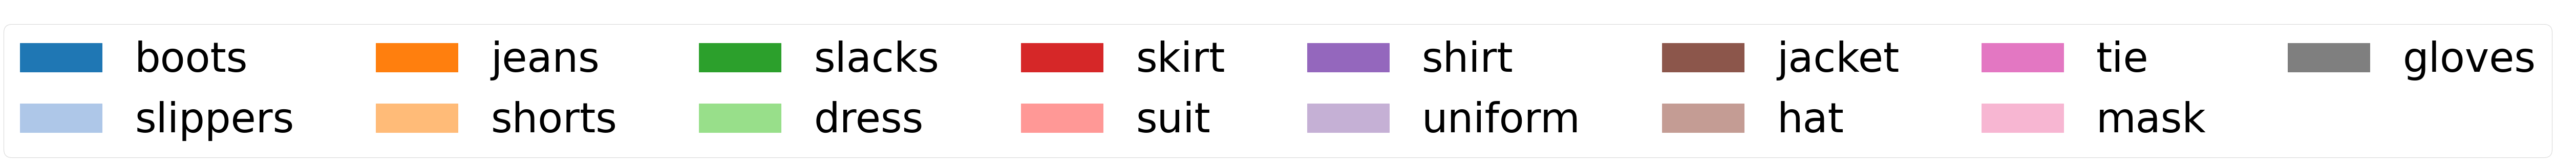

In [198]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, imshow, axis

fig, ax = plt.subplots(figsize=(10, 5))
patches = []
label_list = get_last_word(attribute_set[1:])
for i in range(15):
    patches.append(mpatches.Patch(color=color_list[i], label=label_list[i]))
ax.legend(handles=patches, ncol=8, fontsize=80)
axis('off')

plt.show()

In [ ]:
jeans_list = np.array(jeans_list).reshape(2, 160)

In [ ]:
array = np.array([4,2,7,1])
order = array.argsort()
ranks = order.argsort()
print(ranks)

In [ ]:
cc_pred = jeans_list[0]
cc_order = cc_pred.argsort()
cc_ranks = cc_order.argsort()

cls_pred = jeans_list[1]
cls_order = cls_pred.argsort()
cls_ranks = cls_order.argsort()

In [ ]:
rank_diff = cc_ranks - cls_ranks
print(rank_diff)
print(rank_diff.argsort().argsort())

In [ ]:
print(cc_ranks)
print(cls_ranks)

In [ ]:
print(jeans_list[0][:80])
print(jeans_list[0][80:])
print(jeans_list[1][:80])
print(jeans_list[1][80:])

In [ ]:
print(np.array(jeans_res['male']).shape)

In [ ]:
print(len(mix_gender_pred[0]))
print(len(auc_list))

In [ ]:
with open('res_auc.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(get_last_word(attribute_set[1:]) + ['avg'])
    writer.writerow(get_last_word(attribute_set[1:]) + ['avg'])
    writer.writerow(print_list(auc_list[0]))
    writer.writerow(print_list(auc_list[1]))
    writer.writerow(print_list(auc_list[2]))

# Testing Feature

In [ ]:
from tqdm.notebook import tqdm, trange
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)

male_res_add = [[] for _ in range(15)]
female_res_add = [[] for _ in range(15)]

times = 10

# for gender, img_fea in (('male', m_img), ('female', f_img), (('lawyer', l_img))):
for gender, img_fea in (('male', m_test_img_fes), ('female', f_test_img_fes)):
    res_add = [[] for _ in range(15)]

    for trial in trange(times):
        for i in range(1, 16):
            # print(text_list[i * 5])
            zero_features = text_fes[:len_con]
            one_features = text_fes[len_con * i: len_con * i + len_con]
            features = torch.cat([zero_features, one_features], dim=0).cpu().numpy()
            labels = np.array([0] * len_con + [1] * len_con)

            test_feature = img_fea[80 * (i - 1):80 * i].reshape(80, -1).cpu().numpy()

            X = features
            Y = labels
            # Always scale the input. The most convenient way is to use a pipeline.
            # clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, loss='modified_huber', tol=1e-3))
            # clf = make_pipeline(SGDClassifier(max_iter=1000, loss='log_loss', tol=1e-3, validation_fraction=0.1, early_stopping=True))
            clf = make_pipeline(SGDClassifier(max_iter=5000, loss='log_loss', tol=1e-3, random_state=trial, validation_fraction=0.1, early_stopping=True))
            # clf = make_pipeline(KNeighborsClassifier(n_neighbors=5))
            # clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))
            clf.fit(X, Y)

            train_pred = clf.predict(features)
            acc = np.sum(labels == train_pred) / labels.shape[0]
            # print(acc)

            pred = clf.predict_proba(test_feature)
            res_add[i - 1].append(np.mean(pred, axis=0))
            
    res_add = [np.mean(np.array(item), axis=0)[1] for item in res_add]

    if gender == 'male':
        male_res_add = res_add
    elif gender == 'female':
        female_res_add = res_add

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(final_random_bias)
y = np.array([female_res_add[i] - male_res_add[i] for i in range(15)])
#find line of best fit
a, b = np.polyfit(x, y, 1)

print(kendalltau(x, y))
print(matthews_corrcoef(to_binary(x), to_binary(y)))
print(dynamic_mcc(x, y))

plt.scatter(x, y)
plt.plot(x, a*x+b, color='green', linestyle='-', linewidth=1)
plt.xlabel('f_att - m_att')
plt.ylabel('efi_att - emi_att')
plt.show()

# Occupation Use Case

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 2))
x = np.array([10 * i for i in range(len(female_res_base))])
# x = attribute_set[1:]
y_f = np.array(female_res_base)
m_f = np.array(male_res_base)
l_f = np.array(lawyer_res_base)

plt.scatter(x, y_f, color='green', label='female')
plt.scatter(x, m_f, color='red', label='male')
plt.scatter(x, l_f, color='orange', label='lawyer')

plt.xlabel('attribute')
plt.ylabel('ei_base')
plt.xticks(10 * np.arange(15), attribute_set[1:])
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 2))
x = np.array([10 * i for i in range(len(female_res_add))])
# x = attribute_set[1:]
y_f = np.array(female_res_add)
m_f = np.array(male_res_add)
l_f = np.array(lawyer_res_add)

plt.scatter(x, y_f, color='green', label='female')
plt.scatter(x, m_f, color='red', label='male')
plt.scatter(x, l_f, color='orange', label='lawyer')

plt.xlabel('attribute')
plt.ylabel('ei_att')
plt.xticks(10 * np.arange(15), attribute_set[1:])
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(f_base)
y = np.array(female_res_base)
#find line of best fit
a, b = np.polyfit(x, y, 1)

print(kendalltau(x, y))

plt.scatter(x, y)
# plt.plot(x, a*x+b, color='green', linestyle='-', linewidth=1)
plt.xlabel('f_base')
plt.ylabel('efi_base')
plt.show()

x = np.array(m_base)
y = np.array(male_res_base)
#find line of best fit
a, b = np.polyfit(x, y, 1)

print(kendalltau(x, y))

plt.scatter(x, y)
# plt.plot(x, a*x+b, color='green', linestyle='-', linewidth=1)
plt.xlabel('m_base')
plt.ylabel('emi_base')
plt.show()

x = np.array(f_att)
y = np.array(female_res_add)
#find line of best fit
a, b = np.polyfit(x, y, 1)

print(kendalltau(x, y))

plt.scatter(x, y)
# plt.plot(x, a*x+b, color='green', linestyle='-', linewidth=1)
plt.xlabel('f_att')
plt.ylabel('efi_att')
plt.show()

x = np.array(m_att)
y = np.array(male_res_add)
#find line of best fit
a, b = np.polyfit(x, y, 1)

print(kendalltau(x, y))

plt.scatter(x, y)
# plt.plot(x, a*x+b, color='green', linestyle='-', linewidth=1)
plt.xlabel('m_att')
plt.ylabel('emi_att')
plt.show()

In [ ]:
x = np.array([f_base[i] - m_base[i] for i in range(15)])
y = np.array([female_res_base[i] - male_res_base[i] for i in range(15)])
#find line of best fit
a, b = np.polyfit(x, y, 1)

print(kendalltau(x, y))
print(matthews_corrcoef(to_binary(x), to_binary(y)))
print(dynamic_mcc(x, y))

plt.scatter(x, y)
plt.plot(x, a*x+b, color='green', linestyle='-', linewidth=1)
plt.xlabel('f_base - m_base')
plt.ylabel('efi_base - emi_base')
plt.show()

x = np.array([f_att[i] - m_att[i] for i in range(15)])
y = np.array([female_res_add[i] - male_res_add[i] for i in range(15)])
#find line of best fit
a, b = np.polyfit(x, y, 1)

print(kendalltau(x, y))
print(matthews_corrcoef(to_binary(x), to_binary(y)))
print(dynamic_mcc(x, y))

plt.scatter(x, y)
plt.plot(x, a*x+b, color='green', linestyle='-', linewidth=1)
plt.xlabel('f_att - m_att')
plt.ylabel('efi_att - emi_att')
plt.show()

In [ ]:
x = [0.02, 0.05, 0.07, 0.18, 0.12, 0.14]
y1 = [5.15,	5.06,	4.8,	9.81,	9.76,	7.08]
y2 = [4.49,	5.68,	4.77,	10.97,	10.37,	6.58]
y3 = [3.79,	4.26,	4.47,	9.25,	5.18,	6.32]

print(kendalltau(x, y1))
print(kendalltau(x, y2))
print(kendalltau(x, y3))


#### Metric 4

In [ ]:
test_image_folder = '/mnt/sdb1/coco/ground_truth_folder1/'
neg_image_folder = '/mnt/sdb1/coco/negative_folder/'

def myFunc1(e):
    return int(e[:-4])

test_img_list = os.listdir(test_image_folder)
test_img_list.sort(key=myFunc1)

neg_img_list = os.listdir(neg_image_folder)
neg_img_list.sort(key=myFunc1)

from PIL import Image
import numpy as np

def get_image_feature(image_list, image_folder):
    image_features = []
    for batch_idx in range(0, len(image_list), 8):
        c_image_pos = [image_folder + image_list[idx] for idx in range(batch_idx, min(batch_idx + 8, len(image_list)))]
        c_images = [preprocess(Image.open(c_image).convert("RGB")) for c_image in c_image_pos]
        with torch.no_grad():
            image_features.append(model.encode_image(torch.tensor(np.stack(c_images)).to(device)).float())
    return torch.concat(image_features, dim=0)

test_img_fes = get_image_feature(test_img_list, test_image_folder)
neg_img_fes = get_image_feature(neg_img_list, neg_image_folder)

with torch.no_grad():
    test_img_fes = test_img_fes / test_img_fes.norm(dim=1, keepdim=True)
    neg_img_fes = neg_img_fes / neg_img_fes.norm(dim=1, keepdim=True)

print(test_img_fes.shape)
print(neg_img_fes.shape)

In [ ]:
from tqdm.notebook import tqdm, trange
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)

male_res_add = [[] for _ in range(15)]
female_res_add = [[] for _ in range(15)]

for gender, img_fea in (('male', m_img), ('female', f_img)):
    res_add = [[] for _ in range(15)]

    for trial in trange(100):
        for i in range(1, 16):
            zero_features = neg_img_fes
            # zero_features = img_fea[:16].reshape(80, -1)
            one_features = img_fea[16 * i:16 * (i + 1)].reshape(80, -1)
            features = torch.cat([zero_features, one_features], dim=0).cpu().numpy()
            labels = np.array([0] * 80 + [1] * 80)

            test_feature = test_img_fes[5 * (i - 1):5 * i].cpu().numpy()

            X = features
            Y = labels
            # Always scale the input. The most convenient way is to use a pipeline.
            # clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, loss='modified_huber', tol=1e-3))
            # clf = make_pipeline(SGDClassifier(max_iter=1000, loss='log_loss', tol=1e-3, validation_fraction=0.1, early_stopping=True))
            clf = make_pipeline(SGDClassifier(max_iter=5000, loss='log_loss', tol=1e-3, random_state=trial, validation_fraction=0.1, early_stopping=True))
            # clf = make_pipeline(KNeighborsClassifier(n_neighbors=5))
            # clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))
            clf.fit(X, Y)

            pred = clf.predict_proba(test_feature)
            res_add[i - 1].append(np.mean(pred, axis=0))


    res_add = [np.mean(np.array(item), axis=0)[1] for item in res_add]
    for i in range(1, 16):
        print(attribute_set[i])
        print(res_add[i - 1])
    if gender == 'male':
        male_res_add = res_add
    else:
        female_res_add = res_add

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([f_att[i] for i in range(15)])
y = np.array([female_res_add[i] for i in range(15)])
#find line of best fit
a, b = np.polyfit(x, y, 1)

print(kendalltau(x, y))

plt.scatter(x, y)
plt.plot(x, a*x+b, color='green', linestyle='-', linewidth=1)
plt.xlabel('f_att')
plt.ylabel('efi_att')
plt.show()

x = np.array([m_att[i] for i in range(15)])
y = np.array([male_res_add[i] for i in range(15)])
#find line of best fit
a, b = np.polyfit(x, y, 1)

print(kendalltau(x, y))

plt.scatter(x, y)
plt.plot(x, a*x+b, color='green', linestyle='-', linewidth=1)
plt.xlabel('m_att')
plt.ylabel('emi_att')
plt.show()


x = np.array([f_att[i] - m_att[i] for i in range(15)])
y = np.array([female_res_add[i] - male_res_add[i] for i in range(15)])
#find line of best fit
a, b = np.polyfit(x, y, 1)

print(kendalltau(x, y))
print(matthews_corrcoef(to_binary(x), to_binary(y)))
print(dynamic_mcc(x, y))

plt.scatter(x, y)
plt.plot(x, a*x+b, color='green', linestyle='-', linewidth=1)
plt.xlabel('f_att - m_att')
plt.ylabel('efi_att - emi_att')
plt.show()

In [ ]:
print(f_base)
print(m_base)
print(f_att)
print(m_att)

# Retrieval

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time

query = ['boots', 'slippers', 'jeans', 'shorts', 'slacks', 'a dress', 'a skirt', 'a suit', 'a shirt', 'uniform', 'a jacket', 'a hat', 'a tie', 'a mask', 'gloves']
c_texts = clip.tokenize(query).to(device)
query_fea = model.encode_text(c_texts).to(device).float()
query_fea = query_fea / query_fea.norm(dim=1, keepdim=True)
print(query_fea.shape)

for idx in range(3):
    print(idx_to_name[idx])
    print("test")
    query_res_male = []
    query_res_female = []
    att_auc = {'male':[], 'female':[]}

    mix_gender_true = [[] for _ in range(15)]
    mix_gender_pred = [[] for _ in range(15)]
    mix_gender_auc = []

    for gender, img_fea in (('male', m_imgs[idx]), ('female', f_imgs[idx])):
        for i in range(1, 16):
            c_query = query_fea[i-1]
            c_keys = torch.cat([img_fea[:16], img_fea[16 * i:16 * (i + 1)]], dim=0).view(160, -1)
            res = c_query @ c_keys.T
            # att_auc[gender].append(roc_auc_score(ground_truths[idx][gender][i - 1].tolist(), torch.argsort(res).tolist()))
            att_auc[gender].append(roc_auc_score(ground_truths[idx][gender][i - 1].tolist(), res.tolist()))
            mix_gender_true[i - 1].extend(ground_truths[idx][gender][i - 1].tolist())
            # mix_gender_pred[i - 1].extend(torch.argsort(res).tolist())
            mix_gender_pred[i - 1].extend(res.tolist())

            att_rank = (160 - torch.argsort(res))[80:]
            avg_rank = torch.mean(att_rank.float()).item()
            if gender == 'male':
                query_res_male.append(avg_rank)
            else:
                query_res_female.append(avg_rank)
    query_diff = [query_res_female[i] - query_res_male[i] for i in range(len(query_res_male))]
    print(np.array(att_auc['male']))
    print(np.mean(att_auc['male']))
    print(np.array(att_auc['female']))
    print(np.mean(att_auc['female']))
    for i in range(15):
        mix_gender_auc.append(roc_auc_score(mix_gender_true[i], mix_gender_pred[i]))
    print(mix_gender_auc)
    print(np.mean(mix_gender_auc))

    x = np.array([f_atts[idx][i] - f_bases[idx][i] for i in range(15)])
    y = np.array(query_res_female)
    #find line of best fit
    a, b = np.polyfit(x, y, 1)

    print(kendalltau(x, y))

    plt.scatter(x, y)
    # plt.plot(x, a*x+b, color='green', linestyle='--', linewidth=2)
    plt.xlabel('f_att - f_base')
    plt.ylabel('r_fi')
    plt.show()

    x = np.array([m_atts[idx][i] - m_bases[idx][i] for i in range(15)])
    y = np.array(query_res_male)
    #find line of best fit
    a, b = np.polyfit(x, y, 1)

    print(kendalltau(x, y))

    plt.scatter(x, y)
    # plt.plot(x, a*x+b, color='green', linestyle='--', linewidth=2)
    plt.xlabel('m_att - m_base')
    plt.ylabel('m_fi')
    plt.show()

    x = np.array([f_atts[idx][i] - m_atts[idx][i] for i in range(15)])
    # x = np.array([(f_att[i] - m_att[i]) - (f_base[i] - m_base[i])  for i in range(15)])
    y = np.array([query_res_female[i] - query_res_male[i] for i in range(15)])
    #find line of best fit
    a, b = np.polyfit(x, y, 1)

    print(kendalltau(x, y))
    print(matthews_corrcoef(to_binary(x), to_binary(y)))
    print(dynamic_mcc(x, y))

    plt.scatter(x, y)
    # plt.plot(x, a*x+b, color='green', linestyle='--', linewidth=2)
    plt.xlabel('f_att - m_att')
    plt.ylabel('r_fi - r_mi')
    plt.show()

    time.sleep(5)